In [1]:
#redid slightly the test set

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [3]:
df = pd.read_csv('../data/Finaldf_Cleaned_4.csv').drop('Unnamed: 0', axis = 1)

In [4]:
df = df.drop('DDP:2012:percent.8', axis = 1)

## 1 Dummy States

In [5]:
states = pd.get_dummies(df['State'], prefix='ST:')

In [6]:
states.head()

ST:_AK  ST:_AL  ST:_AR  ST:_AZ  ST:_CA  ST:_CO  ST:_CT  ST:_DE  ST:_FL  \
0       0       1       0       0       0       0       0       0       0   
1       0       1       0       0       0       0       0       0       0   
2       0       1       0       0       0       0       0       0       0   
3       0       1       0       0       0       0       0       0       0   
4       0       1       0       0       0       0       0       0       0   

   ST:_GA  ...  ST:_SD  ST:_TN  ST:_TX  ST:_UT  ST:_VA  ST:_VT  ST:_WA  \
0       0  ...       0       0       0       0       0       0       0   
1       0  ...       0       0       0       0       0       0       0   
2       0  ...       0       0       0       0       0       0       0   
3       0  ...       0       0       0       0       0       0       0   
4       0  ...       0       0       0       0       0       0       0   

   ST:_WI  ST:_WV  ST:_WY  
0       0       0       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       0       0       0  

[5 rows x 50 columns]

In [7]:
df = df.join(states)

In [8]:
df.sample(5)

State            County     FIPS  2010:UnemploymentRate  FFRPTH09  \
1862    NY     Queens County  36081.0                    8.6  0.713975   
2965    WA  Klickitat County  53039.0                   12.2  0.247967   
2546    TX    Cameron County  48061.0                   11.2  0.519606   
814     IA      Emmet County  19063.0                    7.0  0.482579   
1218    MA  Hampshire County  25015.0                    7.0  0.588943   

      PCT_LACCESS_POP10  Poverty Rate 2010  LI:2010:percent  OB:2010:percent  \
1862           0.334018          14.357329             27.9             22.9   
2965          23.591777          19.093020             22.9             27.8   
2546          27.631608          34.861901             20.9             27.0   
814           27.720659          10.390422             28.5             32.1   
1218          32.974985          11.895630             17.1             22.4   

      OB:2009-2010:Change_rate  ...  ST:_SD  ST:_TN  ST:_TX  ST:_UT  ST:_VA  \
1862                  0.022321  ...       0       0       0       0       0   
2965                  0.018315  ...       0       0       0       0       0   
2546                 -0.007353  ...       0       0       1       0       0   
814                   0.025559  ...       0       0       0       0       0   
1218                  0.004484  ...       0       0       0       0       0   

      ST:_VT  ST:_WA  ST:_WI  ST:_WV  ST:_WY  
1862       0       0       0       0       0  
2965       0       1       0       0       0  
2546       0       0       0       0       0  
814        0       0       0       0       0  
1218       0       0       0       0       0  

[5 rows x 94 columns]

In [9]:
df = df.drop('State', axis = 1)

In [10]:
df.columns

Index(['County', 'FIPS', '2010:UnemploymentRate', 'FFRPTH09',
       'PCT_LACCESS_POP10', 'Poverty Rate 2010', 'LI:2010:percent',
       'OB:2010:percent', 'OB:2009-2010:Change_rate', 'Rural_Pct_2010',
       'pct_male', '2010:AgeGroup01:0-4', '2010:AgeGroup02:5-9',
       '2010:AgeGroup03:10-14', '2010:AgeGroup04:15-19',
       '2010:AgeGroup05:20-24', '2010:AgeGroup06:25-29',
       '2010:AgeGroup07:30-34', '2010:AgeGroup08:35-39',
       '2010:AgeGroup09:40-44', '2010:AgeGroup10:45-49',
       '2010:AgeGroup11:50-54', '2010:AgeGroup12:55-59',
       '2010:AgeGroup13:60-64', '2010:AgeGroup14:65-69',
       '2010:AgeGroup15:70-74', '2010:AgeGroup16:75-79',
       '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+', 'CEN:2010:WA',
       'CEN:2010:BA', 'CEN:2010:IA', 'CEN:2010:AA', 'CEN:2010:NA',
       'CEN:2010:WAC', 'CEN:2010:BAC', 'CEN:2010:IAC', 'CEN:2010:AAC',
       'CEN:2010:NAC', 'CEN:2010:H', 'DDP:2010:percent.6',
       'DDP:2009-2010:Growth_Rate', 'Diabetes_pct_growth_rate', 'ST

## 2 Train / Test / Split, remove FIPS and County columns

In [11]:
X = df.drop(['Diabetes_pct_growth_rate' ], axis = 1)
y = df['Diabetes_pct_growth_rate']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

In [13]:
X_train.tail(10)

County     FIPS  2010:UnemploymentRate  FFRPTH09  \
1169  West Feliciana Parish  22125.0                    6.7  0.255771   
763           Shelby County  18145.0                   11.0  0.404031   
1845           Kings County  36047.0                    9.9  0.651593   
898         Comanche County  20033.0                    4.5  0.000000   
919         Hamilton County  20075.0                    3.1  0.000000   
1164          Vernon Parish  22115.0                    8.6  0.471485   
500            Rabun County  13241.0                   11.8  0.920528   
2989          Brooke County  54009.0                   11.4  0.786652   
421            Crisp County  13081.0                   14.2  0.598854   
1829         Chemung County  36015.0                    8.4  0.630283   

      PCT_LACCESS_POP10  Poverty Rate 2010  LI:2010:percent  OB:2010:percent  \
1169          42.283082          15.280395             29.4             34.9   
763           10.161947          11.909613             30.6             33.8   
1845           0.015700          22.697172             26.2             23.2   
898           17.820662           6.219313             30.9             30.4   
919          100.000000           9.695817             24.8             34.0   
1164          39.142169          12.648970             29.3             37.5   
500            0.711715          23.582626             24.5             29.2   
2989          22.447083          12.741179             35.7             34.4   
421           28.241409          31.235728             36.2             33.8   
1829          23.672775          16.022985             25.7             29.2   

      OB:2009-2010:Change_rate  Rural_Pct_2010  ...  ST:_SD  ST:_TN  ST:_TX  \
1169                  0.070552      100.000000  ...       0       0       0   
763                  -0.053221       52.047889  ...       0       0       0   
1845                 -0.053061        0.001477  ...       0       0       0   
898                   0.051903      100.000000  ...       0       0       0   
919                   0.079365      100.000000  ...       0       0       0   
1164                  0.030220       49.896817  ...       0       0       0   
500                   0.089552       79.282379  ...       0       0       0   
2989                 -0.044444       42.128879  ...       0       0       0   
421                  -0.008798       47.028457  ...       0       0       0   
1829                  0.097744       24.178768  ...       0       0       0   

      ST:_UT  ST:_VA  ST:_VT  ST:_WA  ST:_WI  ST:_WV  ST:_WY  
1169       0       0       0       0       0       0       0  
763        0       0       0       0       0       0       0  
1845       0       0       0       0       0       0       0  
898        0       0       0       0       0       0       0  
919        0       0       0       0       0       0       0  
1164       0       0       0       0       0       0       0  
500        0       0       0       0       0       0       0  
2989       0       0       0       0       0       1       0  
421        0       0       0       0       0       0       0  
1829       0       0       0       0       0       0       0  

[10 rows x 92 columns]

In [14]:
#X_train_try_1_first_10 indices:
#array([1211, 1514, 2503, 2818, 1167, 2986, 2751, 1434, 1729,  897])

#last 10 indices:
#array([1169,  763, 1845,  898,  919, 1164,  500, 2989,  421, 1829])

In [15]:
X_train = X_train.drop(['County', 'FIPS'], axis = 1)
X_test = X_test.drop(['County', 'FIPS'], axis = 1)

In [16]:
X_test.shape

(941, 90)

In [17]:
X_train.shape

(2194, 90)

## 3 EDA Prep: Identify groups of columns for EDA

In [20]:
df.columns

Index(['County', 'FIPS', '2010:UnemploymentRate', 'FFRPTH09',
       'PCT_LACCESS_POP10', 'Poverty Rate 2010', 'LI:2010:percent',
       'OB:2010:percent', 'OB:2009-2010:Change_rate', 'Rural_Pct_2010',
       'pct_male', '2010:AgeGroup01:0-4', '2010:AgeGroup02:5-9',
       '2010:AgeGroup03:10-14', '2010:AgeGroup04:15-19',
       '2010:AgeGroup05:20-24', '2010:AgeGroup06:25-29',
       '2010:AgeGroup07:30-34', '2010:AgeGroup08:35-39',
       '2010:AgeGroup09:40-44', '2010:AgeGroup10:45-49',
       '2010:AgeGroup11:50-54', '2010:AgeGroup12:55-59',
       '2010:AgeGroup13:60-64', '2010:AgeGroup14:65-69',
       '2010:AgeGroup15:70-74', '2010:AgeGroup16:75-79',
       '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+', 'CEN:2010:WA',
       'CEN:2010:BA', 'CEN:2010:IA', 'CEN:2010:AA', 'CEN:2010:NA',
       'CEN:2010:WAC', 'CEN:2010:BAC', 'CEN:2010:IAC', 'CEN:2010:AAC',
       'CEN:2010:NAC', 'CEN:2010:H', 'DDP:2010:percent.6',
       'DDP:2009-2010:Growth_Rate', 'Diabetes_pct_growth_rate', 'ST

In [46]:
#dont forget to remove the target!
feats_all =  ['2010:UnemploymentRate', 'FFRPTH09',
       'PCT_LACCESS_POP10', 'Poverty Rate 2010', 'LI:2010:percent',
       'OB:2010:percent', 'OB:2009-2010:Change_rate', 'Rural_Pct_2010',
       'pct_male', '2010:AgeGroup01:0-4', '2010:AgeGroup02:5-9',
       '2010:AgeGroup03:10-14', '2010:AgeGroup04:15-19',
       '2010:AgeGroup05:20-24', '2010:AgeGroup06:25-29',
       '2010:AgeGroup07:30-34', '2010:AgeGroup08:35-39',
       '2010:AgeGroup09:40-44', '2010:AgeGroup10:45-49',
       '2010:AgeGroup11:50-54', '2010:AgeGroup12:55-59',
       '2010:AgeGroup13:60-64', '2010:AgeGroup14:65-69',
       '2010:AgeGroup15:70-74', '2010:AgeGroup16:75-79',
       '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+', 'CEN:2010:WA',
       'CEN:2010:BA', 'CEN:2010:IA', 'CEN:2010:AA', 'CEN:2010:NA',
       'CEN:2010:WAC', 'CEN:2010:BAC', 'CEN:2010:IAC', 'CEN:2010:AAC',
       'CEN:2010:NAC', 'CEN:2010:H', 'DDP:2010:percent.6',
       'DDP:2009-2010:Growth_Rate', 'ST:_AK',
       'ST:_AL', 'ST:_AR', 'ST:_AZ', 'ST:_CA', 'ST:_CO', 'ST:_CT', 'ST:_DE',
       'ST:_FL', 'ST:_GA', 'ST:_HI', 'ST:_IA', 'ST:_ID', 'ST:_IL', 'ST:_IN',
       'ST:_KS', 'ST:_KY', 'ST:_LA', 'ST:_MA', 'ST:_MD', 'ST:_ME', 'ST:_MI',
       'ST:_MN', 'ST:_MO', 'ST:_MS', 'ST:_MT', 'ST:_NC', 'ST:_ND', 'ST:_NE',
       'ST:_NH', 'ST:_NJ', 'ST:_NM', 'ST:_NV', 'ST:_NY', 'ST:_OH', 'ST:_OK',
       'ST:_OR', 'ST:_PA', 'ST:_RI', 'ST:_SC', 'ST:_SD', 'ST:_TN', 'ST:_TX',
       'ST:_UT', 'ST:_VA', 'ST:_VT', 'ST:_WA', 'ST:_WI', 'ST:_WV', 'ST:_WY']
feats_no_ages_race_states =  ['2010:UnemploymentRate', 'FFRPTH09',
       'PCT_LACCESS_POP10', 'Poverty Rate 2010', 'LI:2010:percent',
       'OB:2010:percent', 'OB:2009-2010:Change_rate', 'Rural_Pct_2010',
       'pct_male', 'DDP:2010:percent.6',
       'DDP:2009-2010:Growth_Rate']
feats_age_only = [ '2010:AgeGroup01:0-4', '2010:AgeGroup02:5-9',
       '2010:AgeGroup03:10-14', '2010:AgeGroup04:15-19',
       '2010:AgeGroup05:20-24', '2010:AgeGroup06:25-29',
       '2010:AgeGroup07:30-34', '2010:AgeGroup08:35-39',
       '2010:AgeGroup09:40-44', '2010:AgeGroup10:45-49',
       '2010:AgeGroup11:50-54', '2010:AgeGroup12:55-59',
       '2010:AgeGroup13:60-64', '2010:AgeGroup14:65-69',
       '2010:AgeGroup15:70-74', '2010:AgeGroup16:75-79',
       '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+']
feats_race_only =  ['CEN:2010:WA',
       'CEN:2010:BA', 'CEN:2010:IA', 'CEN:2010:AA', 'CEN:2010:NA',
       'CEN:2010:WAC', 'CEN:2010:BAC', 'CEN:2010:IAC', 'CEN:2010:AAC',
       'CEN:2010:NAC', 'CEN:2010:H']
feats_states_only = ['ST:_AK',
       'ST:_AL', 'ST:_AR', 'ST:_AZ', 'ST:_CA', 'ST:_CO', 'ST:_CT', 'ST:_DE',
       'ST:_FL', 'ST:_GA', 'ST:_HI', 'ST:_IA', 'ST:_ID', 'ST:_IL', 'ST:_IN',
       'ST:_KS', 'ST:_KY', 'ST:_LA', 'ST:_MA', 'ST:_MD', 'ST:_ME', 'ST:_MI',
       'ST:_MN', 'ST:_MO', 'ST:_MS', 'ST:_MT', 'ST:_NC', 'ST:_ND', 'ST:_NE',
       'ST:_NH', 'ST:_NJ', 'ST:_NM', 'ST:_NV', 'ST:_NY', 'ST:_OH', 'ST:_OK',
       'ST:_OR', 'ST:_PA', 'ST:_RI', 'ST:_SC', 'ST:_SD', 'ST:_TN', 'ST:_TX',
       'ST:_UT', 'ST:_VA', 'ST:_VT', 'ST:_WA', 'ST:_WI', 'ST:_WV', 'ST:_WY']

In [47]:
target_feats_all =  feats_all + ['Diabetes_pct_growth_rate']
target_feats_no_ages_race_states =  feats_no_ages_race_states + ['Diabetes_pct_growth_rate']
target_feats_age_only = feats_age_only + ['Diabetes_pct_growth_rate']
target_feats_race_only =  feats_race_only + ['Diabetes_pct_growth_rate']
target_feats_states_only = feats_states_only + ['Diabetes_pct_growth_rate']

## 4 EDA Plotting (with whole df, training + test)

### (0) target distribution

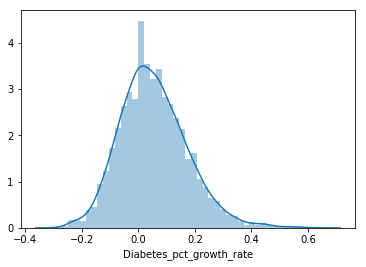

In [36]:
sns.distplot(df['Diabetes_pct_growth_rate'])

### (a) pairplots

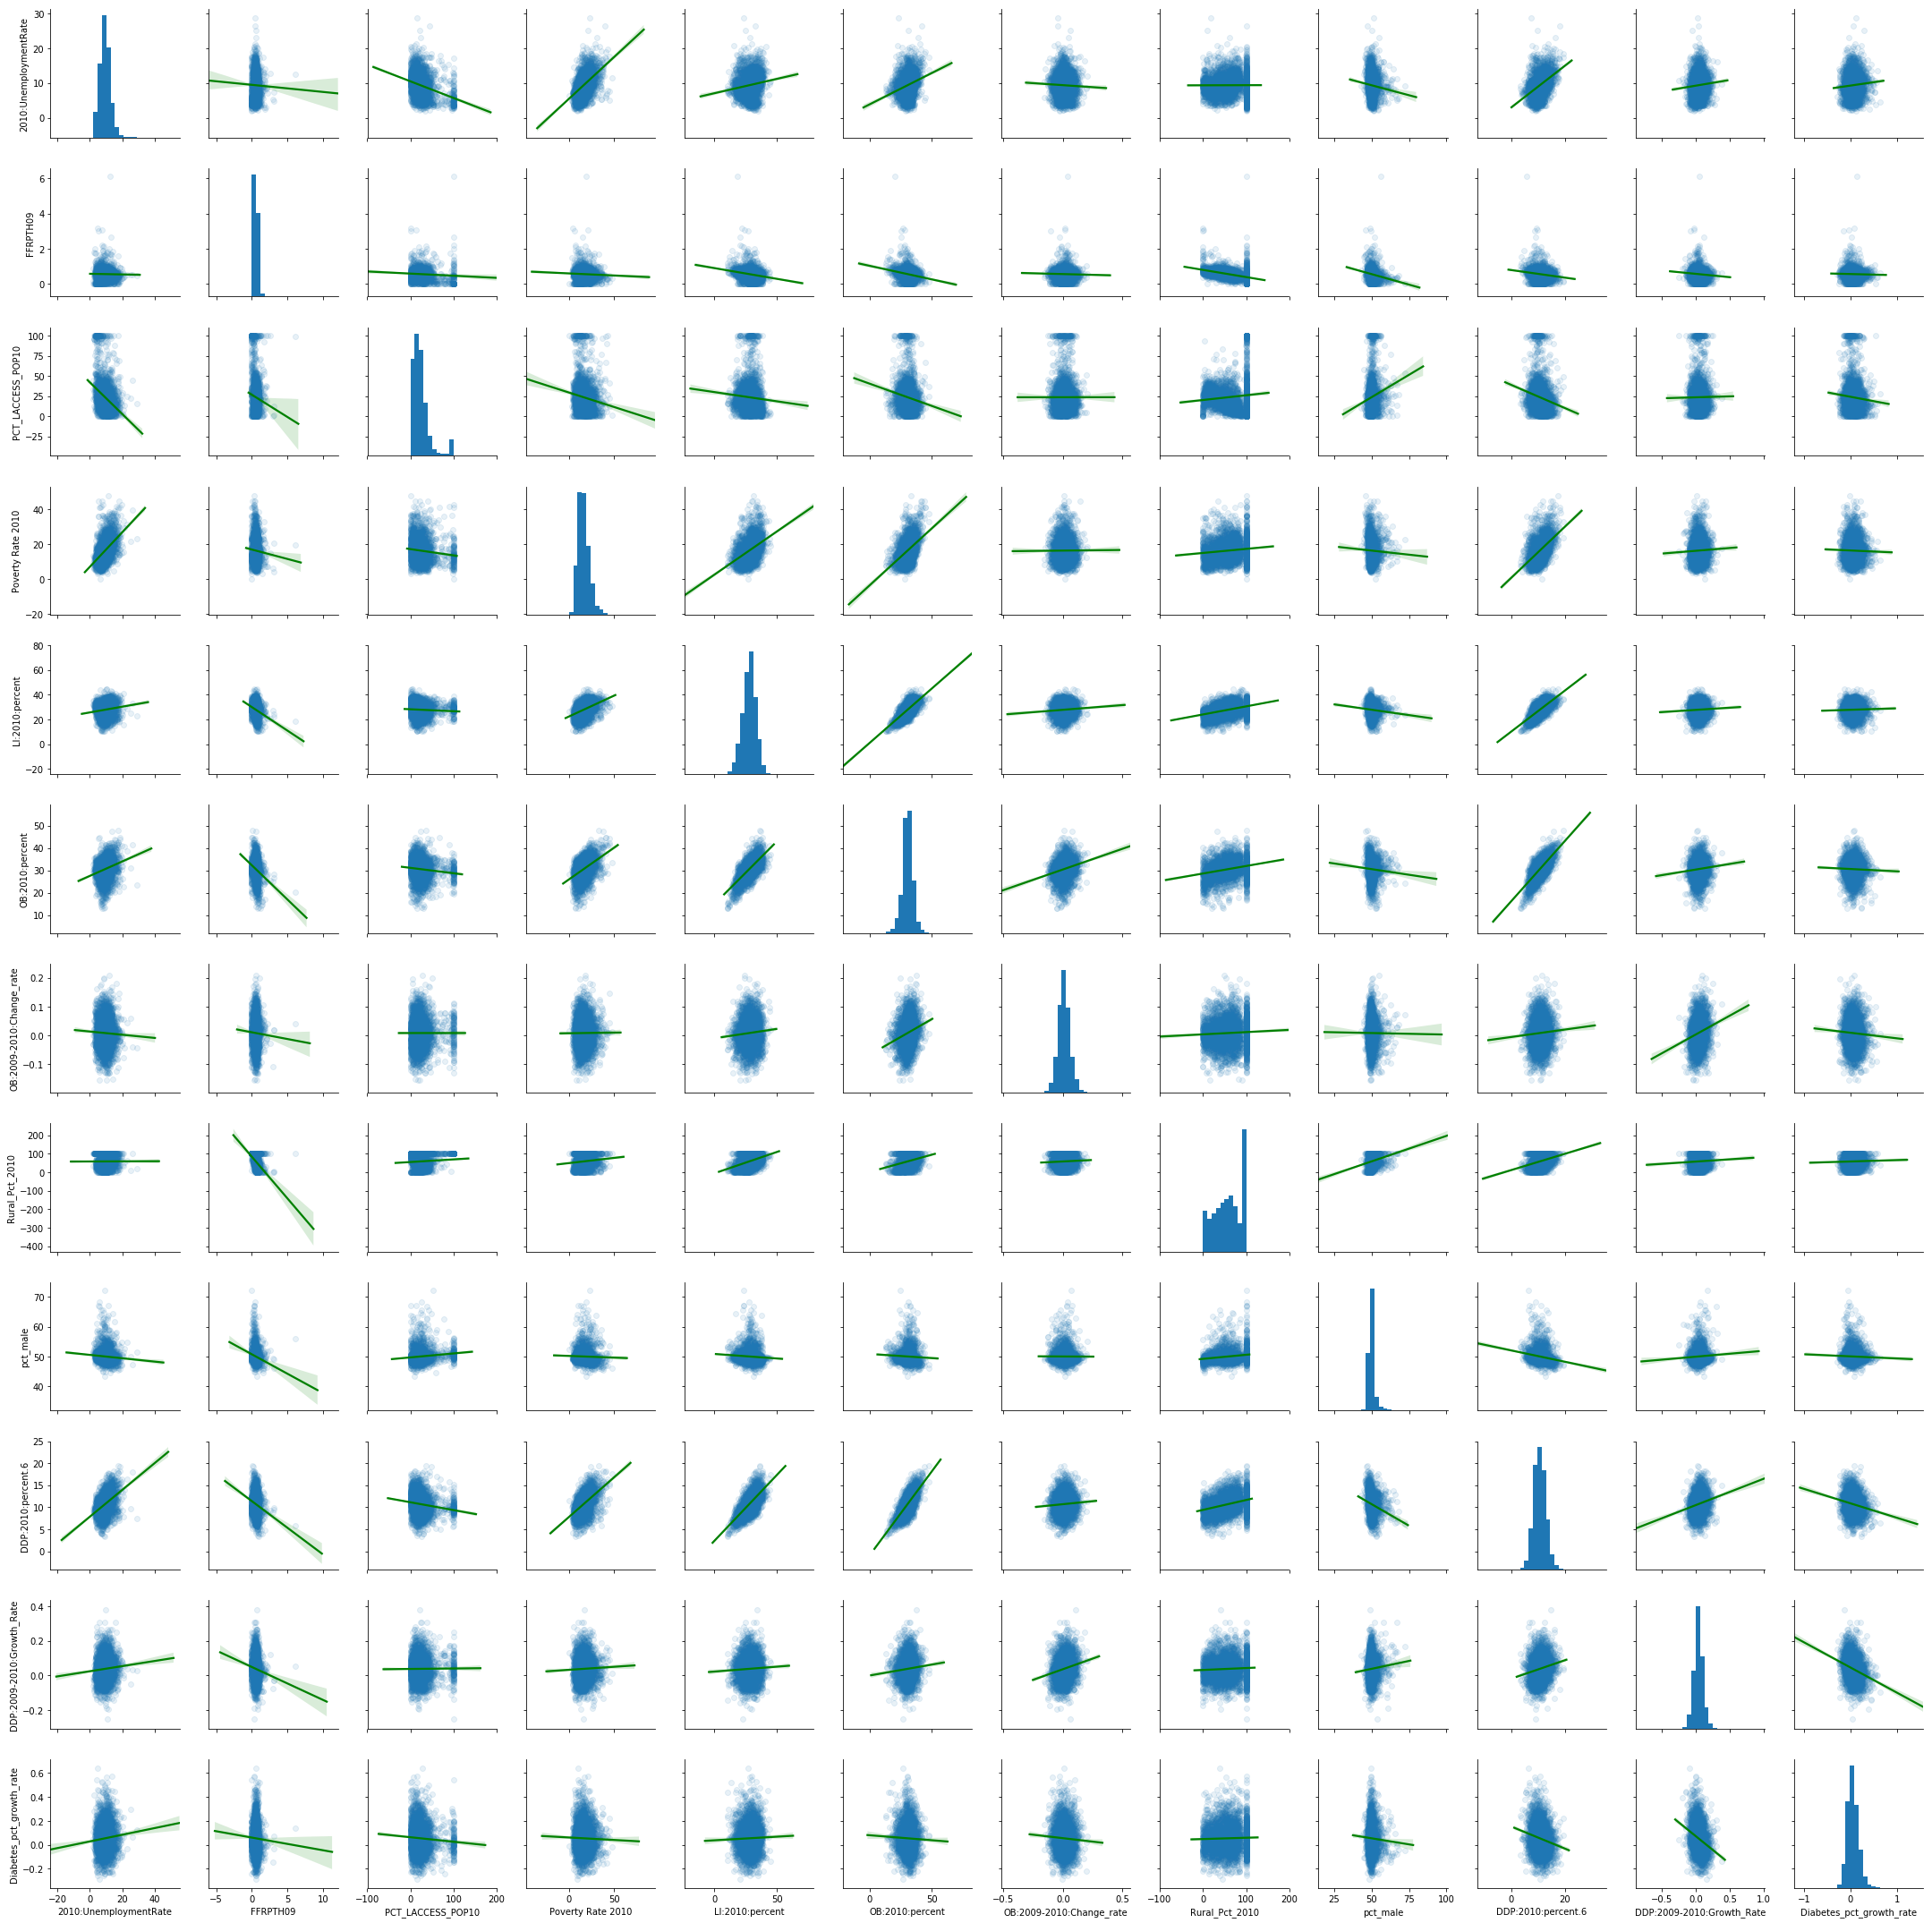

In [135]:
sns.pairplot(df[target_feats_no_ages_race_states], kind="reg", plot_kws={'line_kws':{'color':'green'}, 'scatter_kws': {'alpha': 0.1}})

#sns.pairplot(df[target_feats_no_ages_race_states])

In [35]:
df[target_feats_no_ages_race_states].shape

(3135, 13)

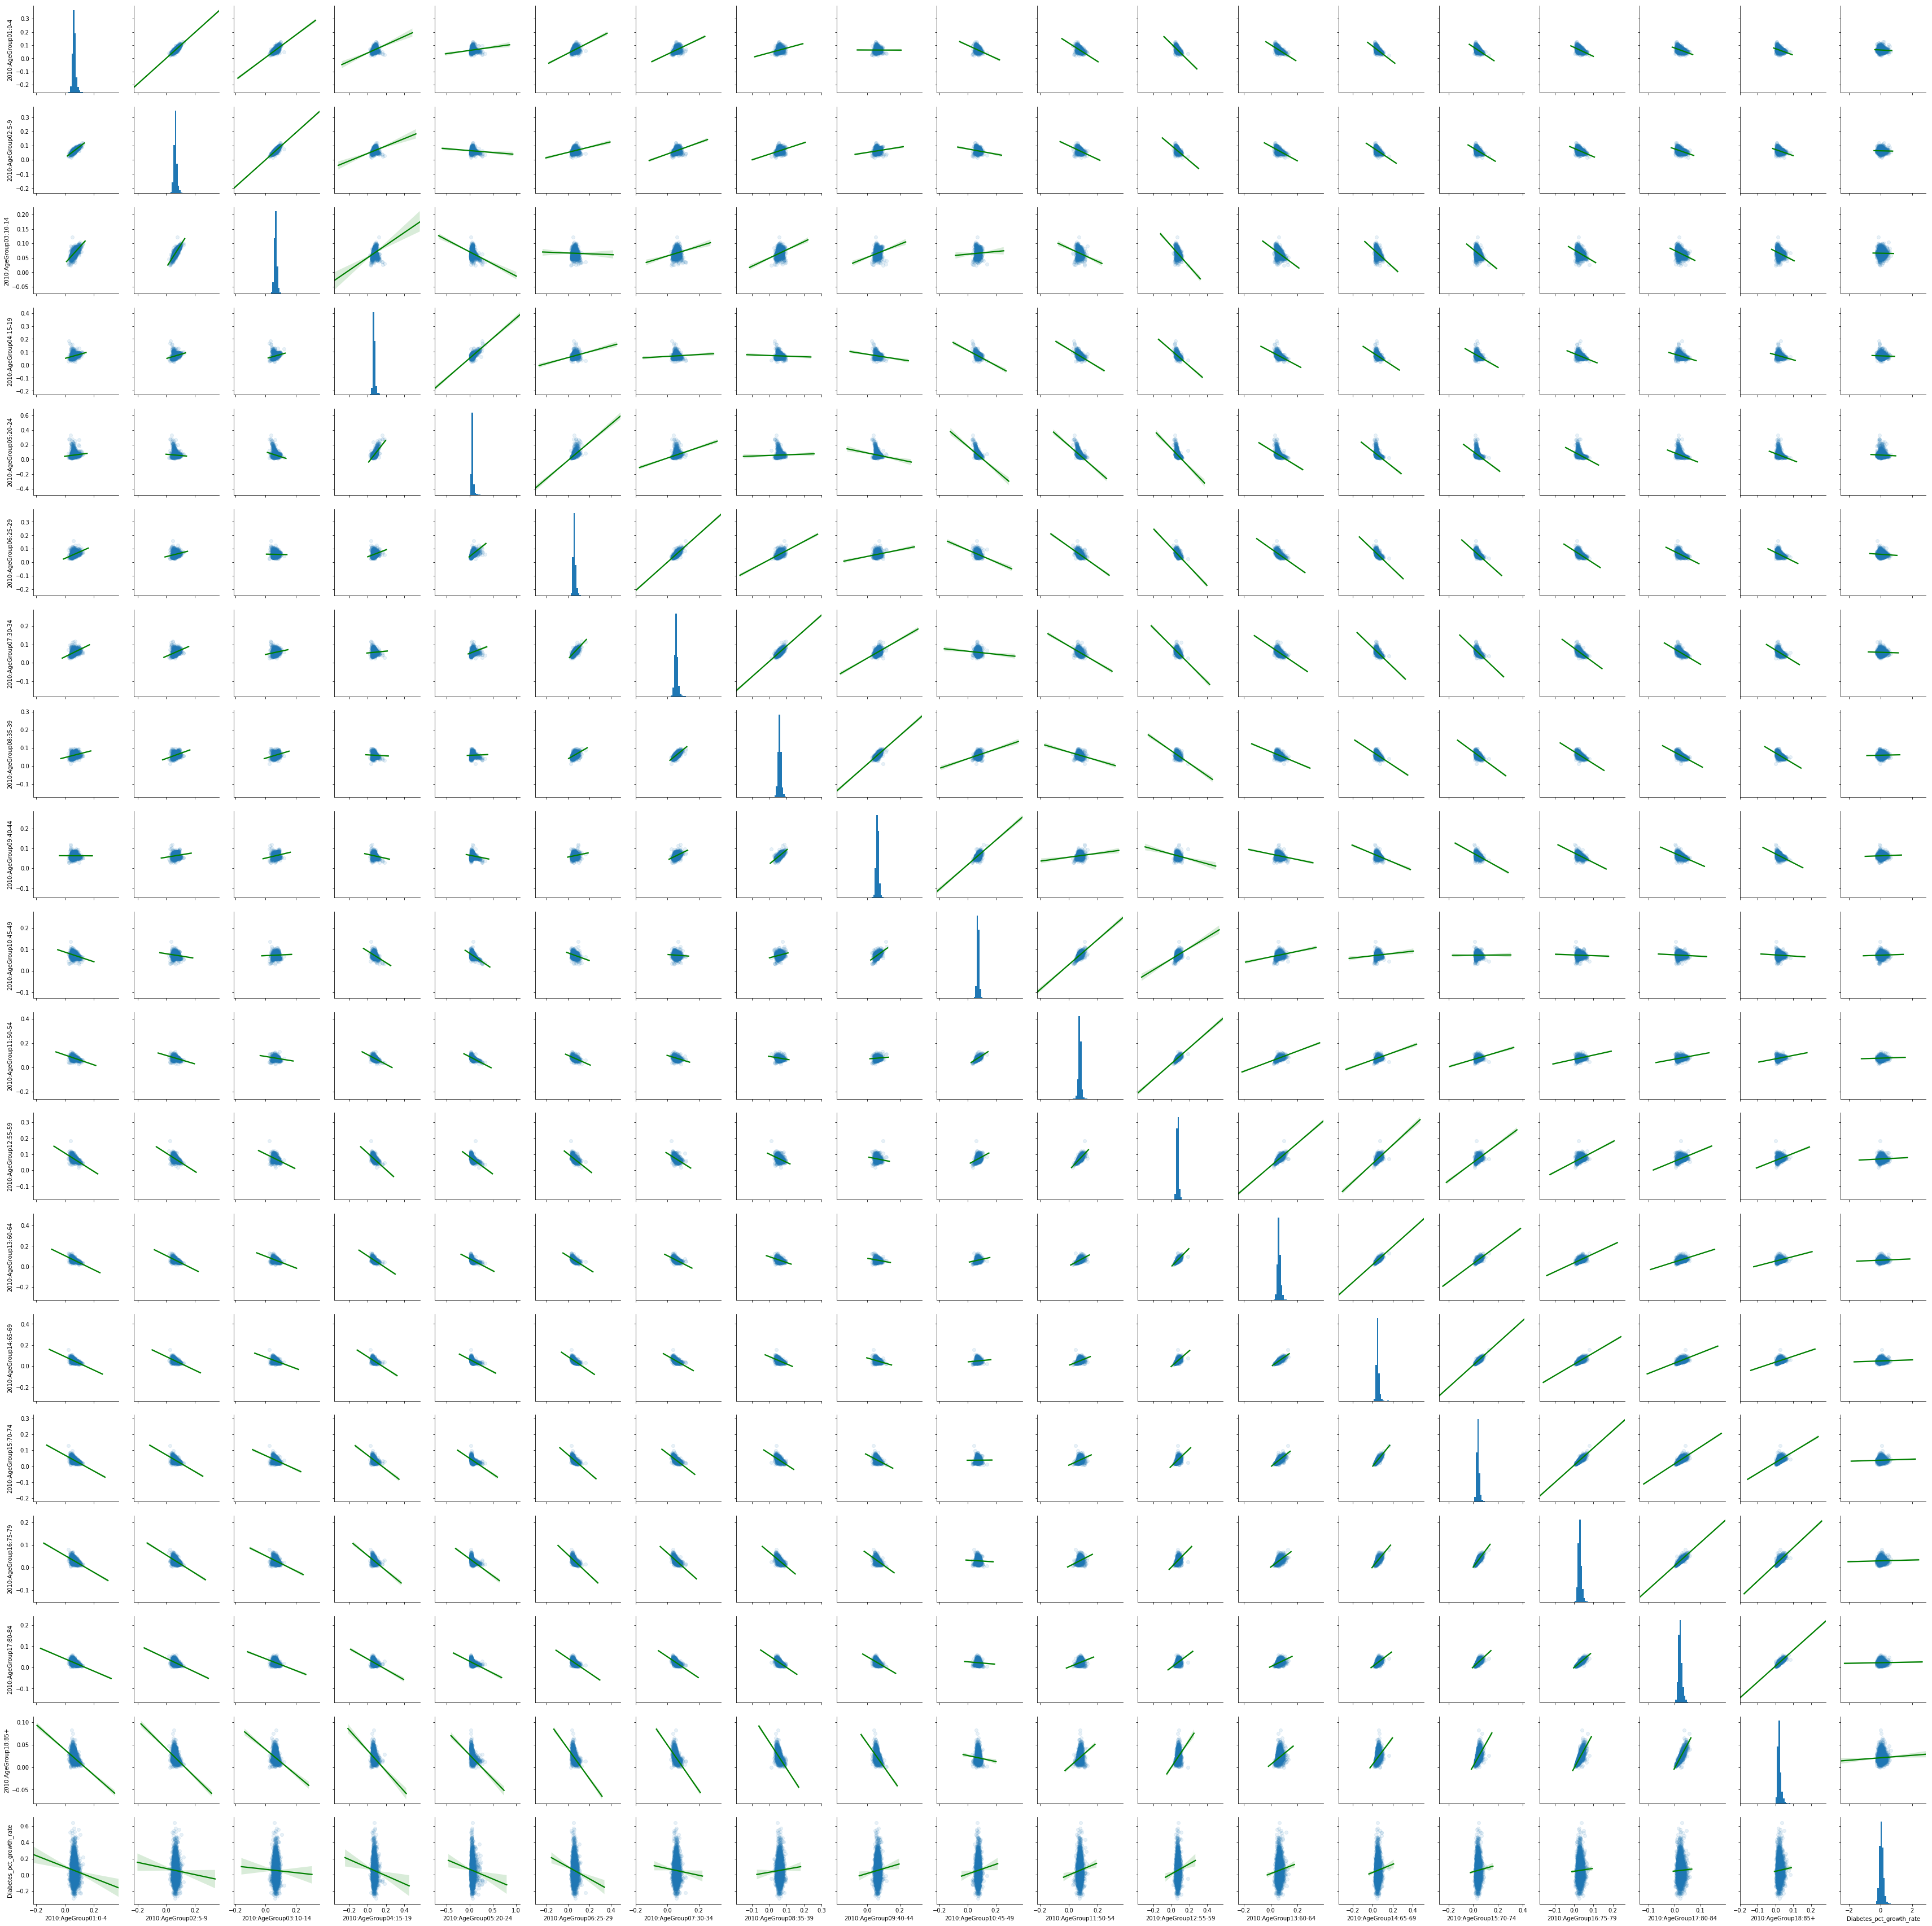

In [136]:
sns.pairplot(df[target_feats_age_only], kind="reg", plot_kws={'line_kws':{'color':'green'}, 'scatter_kws': {'alpha': 0.1}})

In [ ]:
sns.pairplot(df[target_feats_race_only], kind="reg", plot_kws={'line_kws':{'color':'green'}, 'scatter_kws': {'alpha': 0.1}})

### (aa) pairplot, color-coded for H/M/L diabetes growth

In [27]:
s = df["target_feats_no_ages_race_states"].sample(100)

In [28]:
df_plot_no_ages = df["target_feats_no_ages_race_states"].copy()
df_plot_no_ages['Diabetes:High,Med,Low']

In [32]:
low = np.percentile(df_plot_no_ages['Diabetes_pct_growth_rate'], 33)
med = np.percentile(df_plot_no_ages['Diabetes_pct_growth_rate'], 66)

In [37]:
df_plot_no_ages['Diab_rate_HML'] = [1 if x < low else (2 if x < med else 3) for x in df_plot_no_ages['Diabetes_pct_growth_rate']]

/Users/LB/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/LB/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


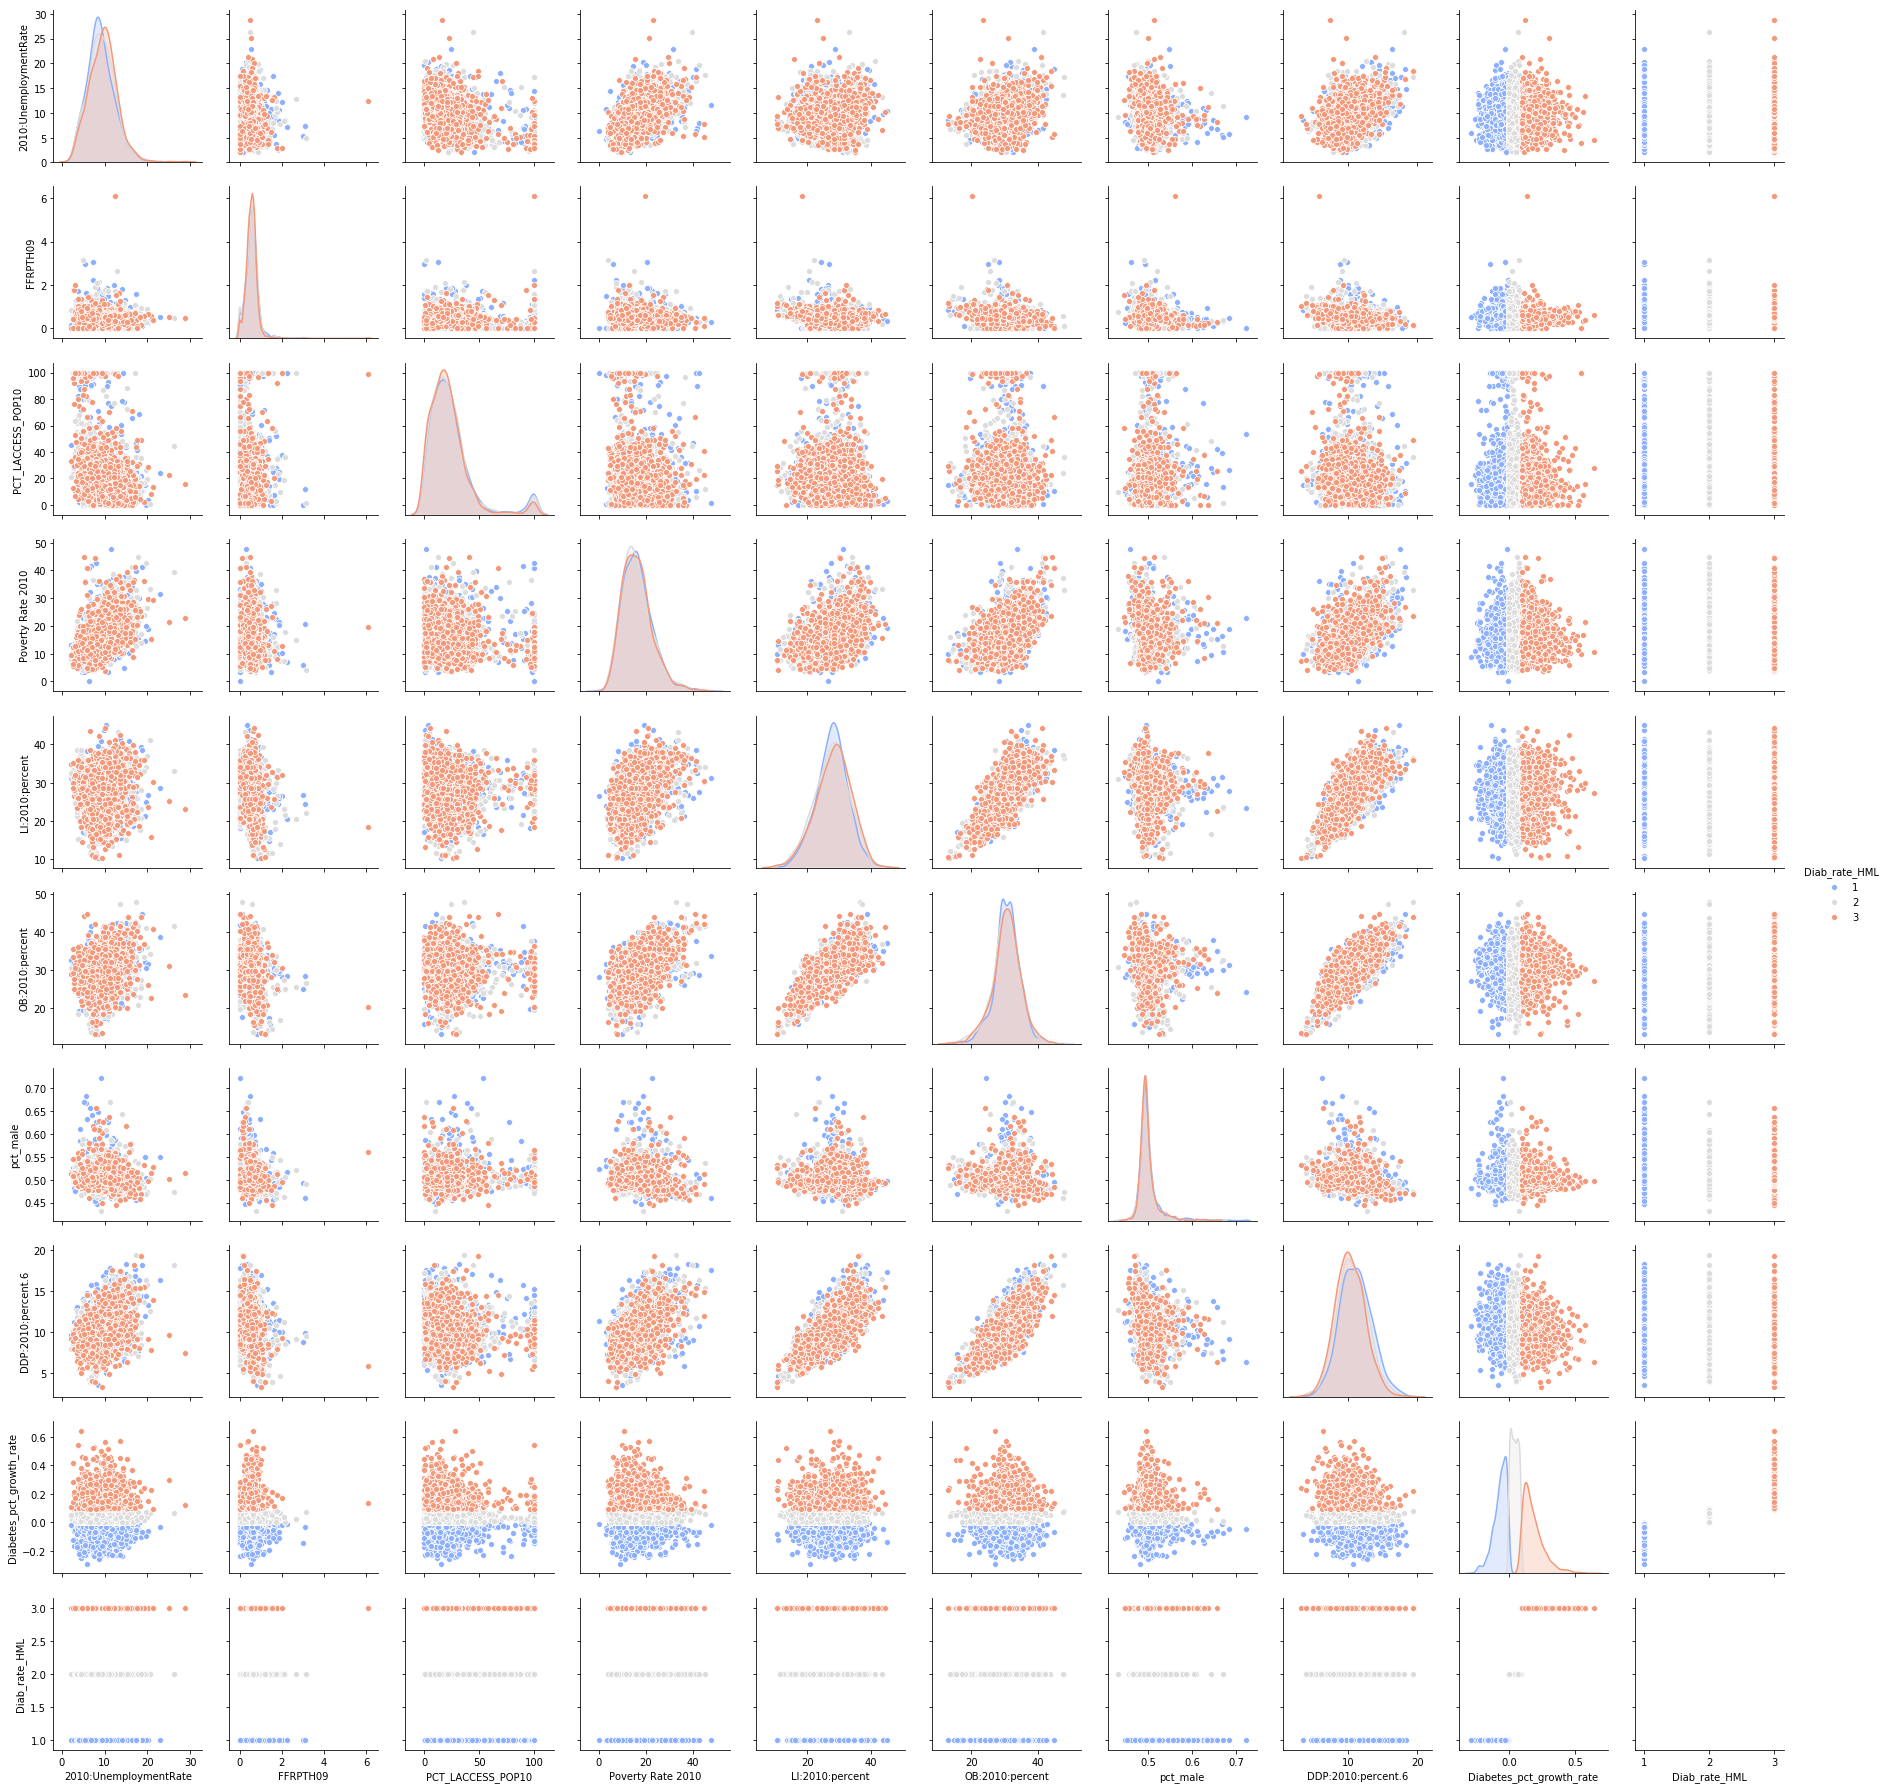

In [38]:
sns.pairplot(df_plot_no_ages, hue='Diab_rate_HML', palette='coolwarm')

### (b) correlation matrices

Text(0.5,1,'Standard Correlation Matrix')

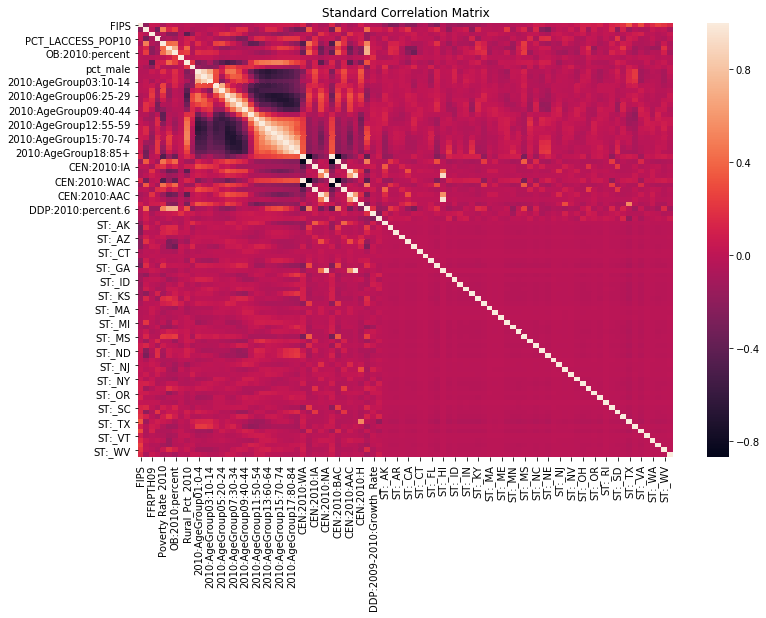

In [39]:
corr = df.corr()
corr
plt.figure(figsize = (12, 8))
sns.heatmap(corr)
plt.title("Standard Correlation Matrix")

In [98]:
corr[(corr >= .9).sum(axis = 1) > 1]  #need to remove one of the race types

FIPS  2010:UnemploymentRate  FFRPTH09  \
2010:AgeGroup14:65-69  0.053395               0.144440 -0.147092   
2010:AgeGroup15:70-74  0.067330               0.045122 -0.190333   
CEN:2010:WA            0.133879              -0.307915 -0.018457   
CEN:2010:BA           -0.126707               0.345309  0.021705   
CEN:2010:IA            0.000310               0.012357 -0.093542   
CEN:2010:AA           -0.087519              -0.049867  0.192469   
CEN:2010:NA           -0.069969              -0.003909  0.073232   
CEN:2010:WAC           0.132043              -0.312161 -0.010818   
CEN:2010:BAC          -0.125329               0.344575  0.027787   
CEN:2010:IAC          -0.003485               0.011628 -0.089990   
CEN:2010:AAC          -0.090467              -0.045256  0.190725   
CEN:2010:NAC          -0.058399              -0.002594  0.065419   
ST:_HI                -0.036419              -0.012077  0.044649   

                       PCT_LACCESS_POP10  Poverty Rate 2010  LI:2010:percent  \
2010:AgeGroup14:65-69           0.070504          -0.008817         0.145839   
2010:AgeGroup15:70-74           0.138903           0.006103         0.241244   
CEN:2010:WA                     0.022944          -0.465264        -0.162522   
CEN:2010:BA                    -0.105767           0.449342         0.249790   
CEN:2010:IA                     0.156008           0.199884         0.035869   
CEN:2010:AA                    -0.027288          -0.146018        -0.353525   
CEN:2010:NA                     0.012619          -0.035971        -0.146662   
CEN:2010:WAC                    0.027701          -0.476626        -0.181108   
CEN:2010:BAC                   -0.107702           0.445196         0.244241   
CEN:2010:IAC                    0.157334           0.188113         0.027605   
CEN:2010:AAC                   -0.017964          -0.148874        -0.361197   
CEN:2010:NAC                    0.023493          -0.037015        -0.130520   
ST:_HI                          0.018024          -0.024040        -0.065057   

                       OB:2010:percent  OB:2009-2010:Change_rate  \
2010:AgeGroup14:65-69        -0.056401                  0.027815   
2010:AgeGroup15:70-74         0.019307                  0.044262   
CEN:2010:WA                  -0.356988                  0.016155   
CEN:2010:BA                   0.407070                  0.005156   
CEN:2010:IA                   0.122765                 -0.013374   
CEN:2010:AA                  -0.314602                 -0.071392   
CEN:2010:NA                  -0.112379                 -0.015830   
CEN:2010:WAC                 -0.372442                  0.013745   
CEN:2010:BAC                  0.403200                  0.003726   
CEN:2010:IAC                  0.112941                 -0.013539   
CEN:2010:AAC                 -0.313564                 -0.067811   
CEN:2010:NAC                 -0.105164                 -0.011444   
ST:_HI                       -0.066116                 -0.003619   

                       Rural_Pct_2010  pct_male  ...    ST:_SD    ST:_TN  \
2010:AgeGroup14:65-69        0.505539 -0.034625  ... -0.038915  0.060547   
2010:AgeGroup15:70-74        0.514314 -0.053043  ...  0.027950  0.025395   
CEN:2010:WA                  0.151966  0.066464  ... -0.012900  0.048824   
CEN:2010:BA                 -0.116576 -0.124152  ... -0.086251 -0.021496   
CEN:2010:IA                  0.092327  0.091816  ...  0.213459 -0.040636   
CEN:2010:AA                 -0.422117 -0.000996  ... -0.042531 -0.042780   
CEN:2010:NA                 -0.132874  0.031905  ... -0.020973 -0.019677   
CEN:2010:WAC                 0.137963  0.069877  ... -0.012462  0.046298   
CEN:2010:BAC                -0.130458 -0.128533  ... -0.088250 -0.021395   
CEN:2010:IAC                 0.090596  0.098165  ...  0.205681 -0.042948   
CEN:2010:AAC                -0.410081 -0.000020  ... -0.042649 -0.043927   
CEN:2010:NAC                -0.104393  0.023008  ... -0.016823 -0.016783   
ST:_HI      

In [112]:
corr['Diabetes_pct_growth_rate'].sort_values()

DDP:2009-2010:Growth_Rate   -0.259039
ST:_TX                      -0.183233
DDP:2010:percent.6          -0.173922
CEN:2010:H                  -0.119198
ST:_VA                      -0.086550
2010:AgeGroup06:25-29       -0.075842
ST:_AK                      -0.069775
ST:_ID                      -0.069189
2010:AgeGroup01:0-4         -0.067095
PCT_LACCESS_POP10           -0.064047
ST:_NY                      -0.054474
FIPS                        -0.053129
2010:AgeGroup05:20-24       -0.052379
CEN:2010:IAC                -0.051543
CEN:2010:IA                 -0.050588
2010:AgeGroup04:15-19       -0.047788
OB:2009-2010:Change_rate    -0.047327
CEN:2010:AAC                -0.043712
CEN:2010:NA                 -0.042488
CEN:2010:NAC                -0.040246
ST:_GA                      -0.040169
CEN:2010:AA                 -0.039465
pct_male                    -0.037772
ST:_LA                      -0.036196
CEN:2010:BAC                -0.035341
CEN:2010:BA                 -0.034125
2010:AgeGrou

In [104]:
corr.iloc[33:38] ['Diabetes_pct_growth_rate']

CEN:2010:WAC    0.062987
CEN:2010:BAC   -0.035341
CEN:2010:IAC   -0.051543
CEN:2010:AAC   -0.043712
CEN:2010:NAC   -0.040246
Name: Diabetes_pct_growth_rate, dtype: float64

Text(0.5,1,'Correlation Matrix - Assorted Features')

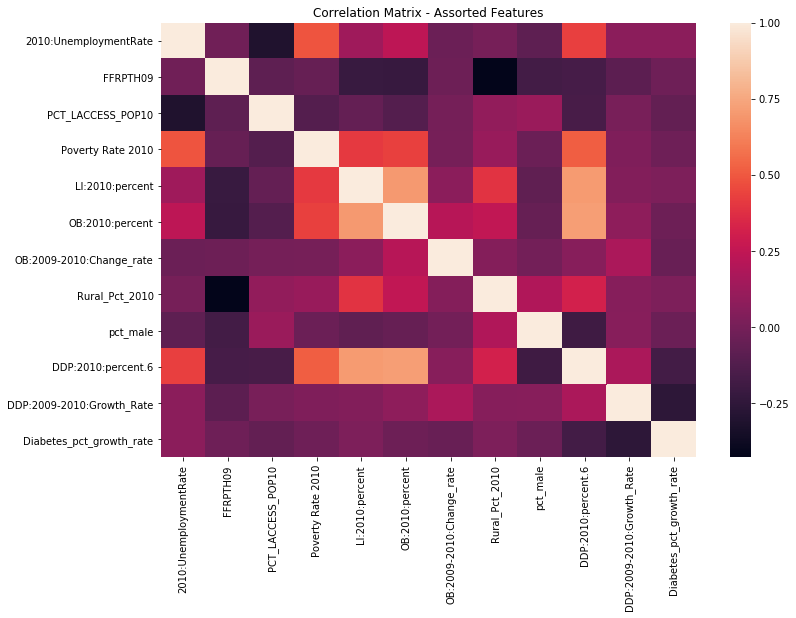

In [48]:
corr_simple = df[target_feats_no_ages_race_states].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr_simple)
plt.title("Correlation Matrix - Assorted Features")

Text(0.5,1,'Correlation Matrix - Race')

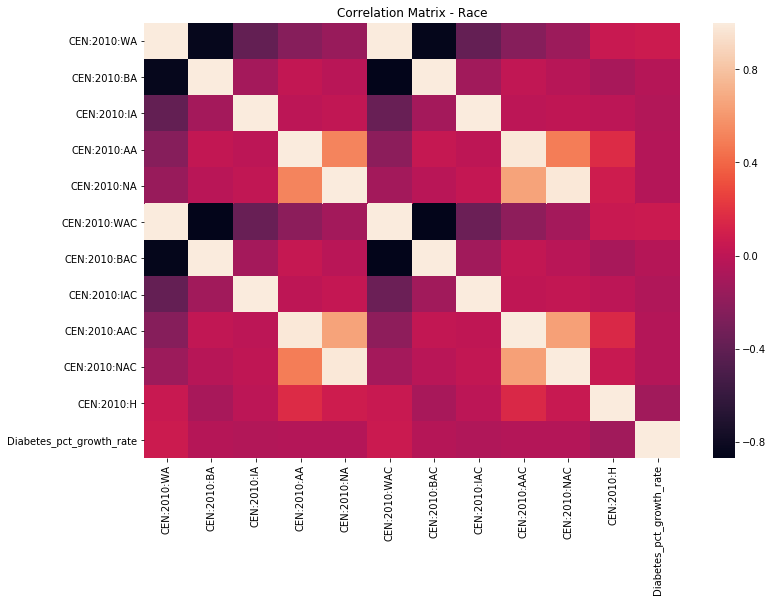

In [49]:
corr_race = df[target_feats_race_only].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr_race)
plt.title("Correlation Matrix - Race")

Text(0.5,1,'Correlation Matrix - Age')

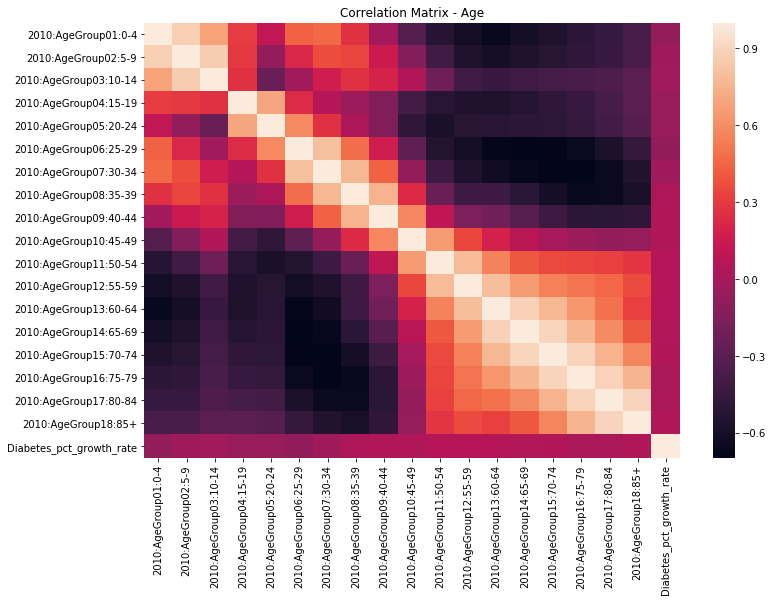

In [50]:
corr_age = df[target_feats_age_only].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr_age)
plt.title("Correlation Matrix - Age")

Text(0.5,1,'Correlation Matrix - State')

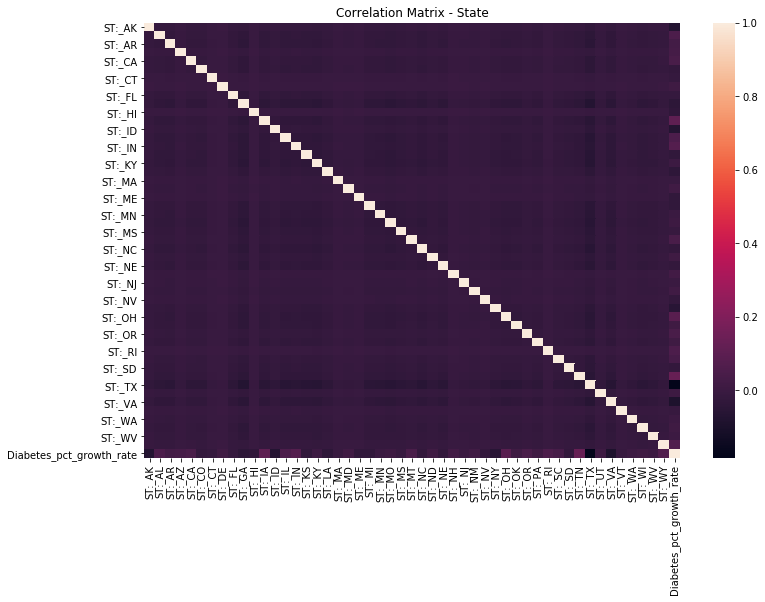

In [51]:
corr_state = df[target_feats_states_only].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr_state)
plt.title("Correlation Matrix - State")

/Users/LB/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5,1,'Correlation Matrix - Race - no diagonals')

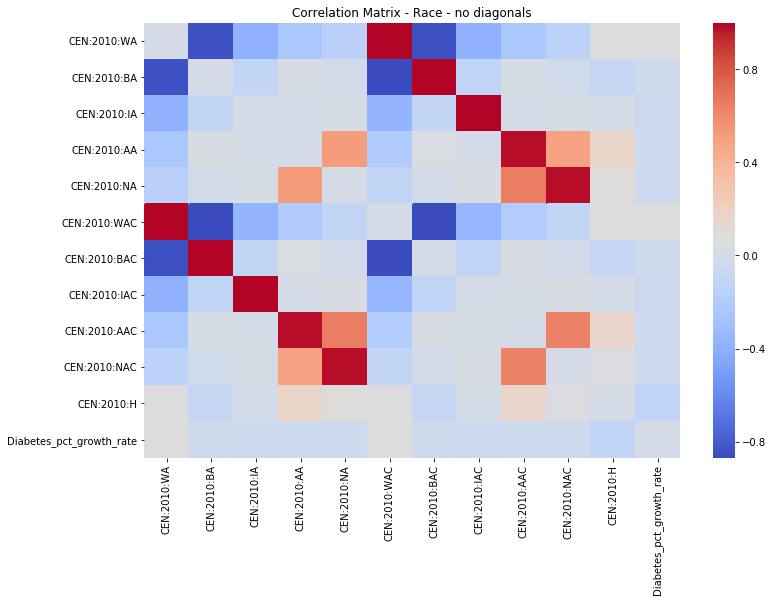

In [52]:
#Plotting when diangonals are zero (to take up less visual weight and balanace out scale)

# corr.values[[np.arange(corr.shape[0])]*2] = 0
# plt.figure(figsize = (12, 8))
# sns.heatmap(corr, cmap='coolwarm')
# plt.title("Correlation matrix - no diagonals")

corr_race = df[target_feats_race_only].corr()

corr_race.values[[np.arange(corr_race.shape[0])]*2] = 0
plt.figure(figsize = (12, 8))
sns.heatmap(corr_race,  cmap='coolwarm')
plt.title("Correlation Matrix - Race - no diagonals")

# Outlier Exploration

In [53]:
df[df['FFRPTH09'] > 6]  #this one outlier is really crazy. for linear regression, removing it. 

County    FIPS  2010:UnemploymentRate  FFRPTH09  \
296  San Juan County  8111.0                   12.5   6.08828   

     PCT_LACCESS_POP10  Poverty Rate 2010  LI:2010:percent  OB:2010:percent  \
296           99.24281          19.544846             18.5             20.2   

     OB:2009-2010:Change_rate  Rural_Pct_2010  ...  ST:_SD  ST:_TN  ST:_TX  \
296                  0.041237           100.0  ...       0       0       0   

     ST:_UT  ST:_VA  ST:_VT  ST:_WA  ST:_WI  ST:_WV  ST:_WY  
296       0       0       0       0       0       0       0  

[1 rows x 93 columns]

In [45]:
df_removed_outliers = df[df['FFRPTH09'] < 6]

# Model 0: Assume Average for all Counties: MSE

In [62]:
X_train.shape

(2194, 90)

In [63]:
avg = y_train.mean()
avg

0.05411160976512701

In [64]:
y_pred_avg = np.array([avg] * X_train.shape[0])
y_pred_avg

array([0.05411161, 0.05411161, 0.05411161, ..., 0.05411161, 0.05411161,
       0.05411161])

In [65]:
avg_model_mse = mean_squared_error(y_train, y_pred_avg)
avg_model_mse

0.013971103175664433

### MSE of "guess average diabetes rate" model (i.e. no model) = 0.01397 
(ideal = 0)

# Model Group A: Linear Regression

## (Dish): Linear Model with all available numeric

In [62]:
model1 = LinearRegression()

In [64]:
X_train.columns

Index(['State', 'County', 'FIPS', '2010:UnemploymentRate', 'FFRPTH09',
       'PCT_LACCESS_POP10', 'Poverty Rate 2010', 'LI:2010:percent',
       'OB:2010:percent', 'pct_male', '2010:AgeGroup01:0-4',
       '2010:AgeGroup02:5-9', '2010:AgeGroup03:10-14', '2010:AgeGroup04:15-19',
       '2010:AgeGroup05:20-24', '2010:AgeGroup06:25-29',
       '2010:AgeGroup07:30-34', '2010:AgeGroup08:35-39',
       '2010:AgeGroup09:40-44', '2010:AgeGroup10:45-49',
       '2010:AgeGroup11:50-54', '2010:AgeGroup12:55-59',
       '2010:AgeGroup13:60-64', '2010:AgeGroup14:65-69',
       '2010:AgeGroup15:70-74', '2010:AgeGroup16:75-79',
       '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+', 'DDP:2010:percent.6'],
      dtype='object')

In [65]:
feats_numeric = ['2010:UnemploymentRate', 'FFRPTH09',
       'PCT_LACCESS_POP10', 'Poverty Rate 2010', 'LI:2010:percent',
       'OB:2010:percent', 'pct_male', '2010:AgeGroup01:0-4',
       '2010:AgeGroup02:5-9', '2010:AgeGroup03:10-14', '2010:AgeGroup04:15-19',
       '2010:AgeGroup05:20-24', '2010:AgeGroup06:25-29',
       '2010:AgeGroup07:30-34', '2010:AgeGroup08:35-39',
       '2010:AgeGroup09:40-44', '2010:AgeGroup10:45-49',
       '2010:AgeGroup11:50-54', '2010:AgeGroup12:55-59',
       '2010:AgeGroup13:60-64', '2010:AgeGroup14:65-69',
       '2010:AgeGroup15:70-74', '2010:AgeGroup16:75-79',
       '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+', 'DDP:2010:percent.6']

In [66]:
cross_val_mse_1 = cross_val_score(model1, X_train[feats_numeric], y_train, cv=5, scoring = 'neg_mean_squared_error')
print('mean MSE',cross_val_mse_1.mean())
cross_val_mse_1


mean MSE -0.011912724326865725


array([-0.01064378, -0.01171675, -0.0117338 , -0.01342824, -0.01204105])

In [71]:
((-cross_val_mse_1.mean()) - avg_model_mse) / avg_model_mse

-0.14755682634954664

#### MSE of linear model when using all columns -> .0119 --> 14 % better than with avg (no) model.

In [73]:
model1.fit(X_train[feats_numeric], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
model1.coef_

array([ 9.22486096e-03, -2.34813694e-02, -2.04744182e-04, -1.98817718e-04,
        7.85811383e-03,  3.08488025e-03, -6.68370171e-01, -6.13533996e-01,
        1.07461375e-01, -5.42061030e-01,  2.71610729e-01, -8.58822651e-02,
        5.79992227e-02, -4.82660159e-01,  2.54914062e+00, -1.00954715e+00,
       -3.08208049e-02, -5.54643783e-01, -4.16100499e-01,  4.05651165e-01,
       -6.26230376e-01,  9.76103487e-01,  1.25830442e-01, -8.01900282e-01,
        6.69583303e-01, -3.53739780e-02])

In [75]:
import statsmodels.api as sm
X_train_sm_1 = sm.add_constant(X_train[feats_numeric], prepend=False)
mod = sm.OLS(np.array(y_train), np.array(X_train_sm_1))
res = mod.fit()
res.summary()

/Users/LB/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     17.36
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           9.65e-69
Time:                        16:09:56   Log-Likelihood:                 1770.3
No. Observations:                2192   AIC:                            -3489.
Df Residuals:                    2166   BIC:                            -3341.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0092      0.001      9.518      0.000       0.007       0.011
x2            -0.0235      0.009     -2.666      0.008      -0.041      -0.006
x3            -0.0002      0.000     -1.650      0.099      -0.000    3.87e-05
x4            -0.0002      0.000     -0.426      0.670      -0.001       0.001
x5             0.0079      0.001     11.100      0.000       0.006       0.009
x6             0.0031      0.001      3.478      0.001       0.001       0.005
x7            -0.6684      0.113     -5.912      0.000      -0.890      -0.447
x8            -0.5913      0.537     -1.101      0.271      -1.645       0.462
x9             0.1297      0.714      0.182      0.856      -1.271       1.530
x10           -0.5198      0.627     -0.829      0.407      -1.750       0.710
x11            0.2938      0.428      0.686      0.493      -0.546       1.134
x12           -0.0637      0.235     -0.271      0.787      -0.525       0.397
x13            0.0802      0.477      0.168      0.867      -0.856       1.016
x14           -0.4604      0.640     -0.720      0.472      -1.715       0.794
x15            2.5714      0.665      3.868      0.000       1.268       3.875
x16           -0.9873      0.599     -1.649      0.099      -2.162       0.187
x17           -0.0086      0.564     -0.015      0.988      -1.115       1.098
x18           -0.5324      0.588     -0.905      0.366      -1.686       0.622
x19           -0.3939      0.569     -0.693      0.489      -1.509       0.721
x20            0.4279      0.584      0.733      0.463      -0.717       1.572
x21           -0.6040      0.639     -0.945      0.345      -1.857       0.649
x22            0.9983      0.840      1.188      0.235      -0.650       2.646
x23            0.1481      0.937      0.158      0.875      -1.690       1.986
x24           -0.7797      1.030     -0.757      0.449      -2.800       1.240
x25            0.6918      0.655      1.057      0.291      -0.592       1.976
x26           -0.0354      0.002    -18.518      0.000      -0.039      -0.032
const          0.4000      0.060      6.629      0.000       0.282       0.518
==============================================================================
Omnibus:                      102.024   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.086
Skew:                           0.441   Prob(JB):                     2.31e-31
Kurtosis:                       3.877   Cond. No.                     1.10e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.18e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix 

In [76]:
col_indices_small_p = np.argwhere(abs(res.pvalues) < .01)
col_indices_small_p = col_indices_small_p[:-1]  #not counting constant
col_indices_small_p

array([[ 0],
       [ 1],
       [ 4],
       [ 5],
       [ 6],
       [14],
       [25]])

In [78]:
col_names_small_p = X_train[feats_numeric].columns[col_indices_small_p]
col_names_small_p = list(col_names_small_p)
col_names_small_p

['2010:UnemploymentRate',
 'FFRPTH09',
 'LI:2010:percent',
 'OB:2010:percent',
 'pct_male',
 '2010:AgeGroup08:35-39',
 'DDP:2010:percent.6']

###   #5 Using columns which had really low p-values


#### MSE was -0.0119  --> i could essentially go without all the other columns and do the same as all

In [80]:
model2 = LinearRegression()

In [81]:
cross_val_mse_2 = cross_val_score(model2, X_train[col_names_small_p], y_train, cv=5, scoring='neg_mean_squared_error')
print ('mean MSE:', cross_val_mse_2.mean())
cross_val_mse_2

mean MSE: -0.011928237127400182


array([-0.01032553, -0.01177638, -0.01176251, -0.01348071, -0.01229605])

In [82]:
model2.fit(X_train[col_names_small_p], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
model2.coef_

array([ 0.00939667, -0.02113692,  0.00786277,  0.00296883, -0.71956832,
        0.94961339, -0.03459067])

In [84]:
col_names_small_p

['2010:UnemploymentRate',
 'FFRPTH09',
 'LI:2010:percent',
 'OB:2010:percent',
 'pct_male',
 '2010:AgeGroup08:35-39',
 'DDP:2010:percent.6']

In [92]:
for i in zip(col_names_small_p, model2.coef_.round(4)):
    print(i)

('2010:UnemploymentRate', 0.0094)
('FFRPTH09', -0.0211)
('LI:2010:percent', 0.0079)
('OB:2010:percent', 0.003)
('pct_male', -0.7196)
('2010:AgeGroup08:35-39', 0.9496)
('DDP:2010:percent.6', -0.0346)


In [93]:
import statsmodels.api as sm
X_train_sm_2 = sm.add_constant(X_train[col_names_small_p], prepend=False)
mod = sm.OLS(np.array(y_train), np.array(X_train_sm_2))
res = mod.fit()
res.summary()

/Users/LB/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     56.59
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           9.95e-75
Time:                        16:15:53   Log-Likelihood:                 1752.8
No. Observations:                2192   AIC:                            -3490.
Df Residuals:                    2184   BIC:                            -3444.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0094      0.001     11.042      0.000       0.008       0.011
x2            -0.0211      0.009     -2.433      0.015      -0.038      -0.004
x3             0.0079      0.001     11.331      0.000       0.007       0.009
x4             0.0030      0.001      3.421      0.001       0.001       0.005
x5            -0.7196      0.112     -6.442      0.000      -0.939      -0.501
x6             0.9496      0.278      3.417      0.001       0.405       1.495
x7            -0.0346      0.002    -18.591      0.000      -0.038      -0.031
const          0.3427      0.063      5.443      0.000       0.219       0.466
==============================================================================
Omnibus:                      102.705   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.983
Skew:                           0.436   Prob(JB):                     3.29e-32
Kurtosis:                       3.910   Cond. No.                     5.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#plot residuals for everything    ####TOMORROW: PLOT RESIDUALS OF THESE, THEN TOMORROW TRY RANDOM FOREST! FOREST!!!!
## DO REGULARIZATION! MAKE COEFFICENTS MUCH SMALLER!!!


# fig, axs = plt.subplots(3,1, figsize=(8,20))

# axs[0].scatter(X_train[unemp2019], results.resid, alpha = .25)
# axs[0].hlines(0,
#               X_train[unemp2019].min(), 
#               X_train[unemp2019].max(), 
#               'k', linestyle='dashed')
# axs[0].set_xlabel('unemployment rates')
# axs[0].set_ylabel('residuals');

# Model #2 -> Random forest(s)

### Plan:
 - Do one with just numbers  (evaluate with MSE)
 - Do one with *state* also (dummy) 
 - Plot partial dependence plots
 - 

In [109]:
model_r1 = RandomForestRegressor(n_estimators = 1000, oob_score=True)

In [110]:
model_r1.fit(X_train[feats_numeric], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [111]:
#cross_val_score(model_r1, X_train[feats_all_numeric_no_target], y_train, cv = 5)   #default score is R2

In [112]:
# model_r1.oob_score_   #R2

In [113]:
y_pred_rf1 = model_r1.oob_prediction_

In [114]:
rf1_mse = mean_squared_error(y_train, y_pred_rf1)
rf1_mse

0.012208238360420284

In [115]:
( rf1_mse -  avg_model_mse ) /  avg_model_mse

-0.1264106205187455

#### MSE of Random Forest model with all columns  = 0.0122 --> 46% decrease in MSE (=12% improvement!)

In [116]:
## SKIPPING THIS FOR NOW!!!

In [105]:
model_r2 = RandomForestRegressor(n_estimators=30)

In [106]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [108]:
n_iter_search = 20
random_search = RandomizedSearchCV(model_r2, param_distributions=random_grid,
                                   n_iter=n_iter_search, cv=5)
random_search.fit(X_train[feats_numeric], y_train)

KeyboardInterrupt: 

In [ ]:
random_search.best_params_

In [130]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100, 200, 500, 1000]
max_features = ['auto', 'sqrt']
max_depth = [15, 30, None],
min_samples_leaf = [1, 2, 4],

# Maximum number of levels in tree
random_grid2 = {'n_estimators': n_estimators,
               'max_features': max_features,
                'max_depth': max_depth
               }

print(random_grid2)

{'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 30, None]}


In [131]:
n_iter_search = 10
random_search = RandomizedSearchCV(model_r2, param_distributions=random_grid2,
                                   n_iter=n_iter_search, cv=5)

In [132]:
random_search.fit(X_train[feats_numeric], y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 30, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [133]:
random_search.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}

# Model 4: Random Forest with State Dummies

In [71]:
model_r3 = RandomForestRegressor(n_estimators = 500, oob_score=True)

cols =  ['2010:UnemploymentRate', 'FFRPTH09', 'PCT_LACCESS_POP10',
       'Poverty Rate 2010', 'LI:2010:percent', 'OB:2010:percent',
       'pct_male',
       '2010:AgeGroup01:0-4', '2010:AgeGroup02:5-9', '2010:AgeGroup03:10-14',
       '2010:AgeGroup04:15-19', '2010:AgeGroup05:20-24',
       '2010:AgeGroup06:25-29', '2010:AgeGroup07:30-34',
       '2010:AgeGroup08:35-39', '2010:AgeGroup09:40-44',
       '2010:AgeGroup10:45-49', '2010:AgeGroup11:50-54',
       '2010:AgeGroup12:55-59', '2010:AgeGroup13:60-64',
       '2010:AgeGroup14:65-69', '2010:AgeGroup15:70-74',
       '2010:AgeGroup16:75-79', '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+',
      'DDP:2010:percent.6',
       'DDP:2009-2010:Growth_Rate', 'ST:_AK', 'ST:_AL', 'ST:_AR', 'ST:_AZ',
       'ST:_CA', 'ST:_CO', 'ST:_CT', 'ST:_DE', 'ST:_FL', 'ST:_GA', 'ST:_HI',
       'ST:_IA', 'ST:_ID', 'ST:_IL', 'ST:_IN', 'ST:_KS', 'ST:_KY', 'ST:_LA',
       'ST:_MA', 'ST:_MD', 'ST:_ME', 'ST:_MI', 'ST:_MN', 'ST:_MO', 'ST:_MS',
       'ST:_MT', 'ST:_NC', 'ST:_ND', 'ST:_NE', 'ST:_NH', 'ST:_NJ', 'ST:_NM',
       'ST:_NV', 'ST:_NY', 'ST:_OH', 'ST:_OK', 'ST:_OR', 'ST:_PA', 'ST:_RI',
       'ST:_SC', 'ST:_SD', 'ST:_TN', 'ST:_TX', 'ST:_UT', 'ST:_VA', 'ST:_VT',
       'ST:_WA', 'ST:_WI', 'ST:_WV', 'ST:_WY']

model_r3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [73]:
y_pred_rf3 = model_r3.oob_prediction_

rf3_mse = mean_squared_error(y_train, y_pred_rf3)
rf3_mse

0.011328571899885734

## Model 5: Random Forest with all new info (obesity % increase, diabetes % increase, rural, race)

In [ ]:
#1 decide which to keep --> race alone, or race combined

In [87]:
model_r4 = RandomForestRegressor(n_estimators = 2000, oob_score=True)

model_r4.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [89]:
y_pred_rf4 = model_r4.oob_prediction_

rf4_mse = mean_squared_error(y_train, y_pred_rf4)
rf4_mse

0.011204331163954436

In [86]:
X_train.columns[model_r4.feature_importances_.argsort()]  #from least --> most
#model_r4.feature_importances_.argsort()

Index(['ST:_HI', 'ST:_DE', 'ST:_ME', 'ST:_MA', 'ST:_CT', 'ST:_MD', 'ST:_NH',
       'ST:_UT', 'ST:_NV', 'ST:_NJ', 'ST:_VT', 'ST:_CA', 'ST:_WV', 'ST:_MS',
       'ST:_RI', 'ST:_ND', 'ST:_AZ', 'ST:_AK', 'ST:_MT', 'ST:_NM', 'ST:_OK',
       'ST:_SD', 'ST:_NY', 'ST:_FL', 'ST:_CO', 'ST:_PA', 'ST:_KY', 'ST:_NE',
       'ST:_MI', 'ST:_LA', 'ST:_WA', 'ST:_WI', 'ST:_KS', 'ST:_GA', 'ST:_MO',
       'ST:_NC', 'ST:_ID', 'ST:_OR', 'ST:_VA', 'ST:_SC', 'ST:_MN', 'ST:_IL',
       'ST:_AR', 'ST:_OH', 'ST:_IN', 'ST:_IA', 'ST:_WY', 'ST:_AL', 'ST:_TN',
       'CEN:2010:WAC', 'CEN:2010:BAC', 'CEN:2010:BA', 'CEN:2010:WA',
       '2010:AgeGroup15:70-74', 'CEN:2010:AA', '2010:AgeGroup16:75-79',
       '2010:AgeGroup18:85+', '2010:AgeGroup17:80-84', '2010:AgeGroup07:30-34',
       'CEN:2010:AAC', '2010:AgeGroup12:55-59', 'CEN:2010:NA', 'CEN:2010:IA',
       'CEN:2010:IAC', '2010:AgeGroup09:40-44', '2010:AgeGroup05:20-24',
       '2010:AgeGroup06:25-29', '2010:AgeGroup02:5-9', '2010:AgeGroup14:65-69',
       '2

# Model 6: Check with race to use (alone or combined)

In [105]:
#check which race ones ot keep

In [106]:
X_train.columns

Index(['2010:UnemploymentRate', 'FFRPTH09', 'PCT_LACCESS_POP10',
       'Poverty Rate 2010', 'LI:2010:percent', 'OB:2010:percent',
       'OB:2009-2010:Change_rate', 'Rural_Pct_2010', 'pct_male',
       '2010:AgeGroup01:0-4', '2010:AgeGroup02:5-9', '2010:AgeGroup03:10-14',
       '2010:AgeGroup04:15-19', '2010:AgeGroup05:20-24',
       '2010:AgeGroup06:25-29', '2010:AgeGroup07:30-34',
       '2010:AgeGroup08:35-39', '2010:AgeGroup09:40-44',
       '2010:AgeGroup10:45-49', '2010:AgeGroup11:50-54',
       '2010:AgeGroup12:55-59', '2010:AgeGroup13:60-64',
       '2010:AgeGroup14:65-69', '2010:AgeGroup15:70-74',
       '2010:AgeGroup16:75-79', '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+',
       'CEN:2010:WA', 'CEN:2010:BA', 'CEN:2010:IA', 'CEN:2010:AA',
       'CEN:2010:NA', 'CEN:2010:WAC', 'CEN:2010:BAC', 'CEN:2010:IAC',
       'CEN:2010:AAC', 'CEN:2010:NAC', 'CEN:2010:H', 'DDP:2010:percent.6',
       'DDP:2009-2010:Growth_Rate', 'ST:_AK', 'ST:_AL', 'ST:_AR', 'ST:_AZ',
       'ST:_CA',

In [107]:
race_alone = ['CEN:2010:WA', 'CEN:2010:BA', 'CEN:2010:IA', 'CEN:2010:AA',
       'CEN:2010:NA']
race_comb = [ 'CEN:2010:WAC', 'CEN:2010:BAC', 'CEN:2010:IAC',
       'CEN:2010:AAC', 'CEN:2010:NAC' ]

In [108]:
model_rf_ralone = RandomForestRegressor(n_estimators = 500, oob_score=True)

model_rf_ralone.fit(X_train[race_alone], y_train)
y_pred_rf_ralone = model_rf_ralone.oob_prediction_

rf_rf_alone_mse = mean_squared_error(y_train, y_pred_rf_ralone)
rf_rf_alone_mse

0.014967117369806947

In [109]:
model_rf_rcomb = RandomForestRegressor(n_estimators = 500, oob_score=True)

model_rf_rcomb.fit(X_train[race_comb], y_train)
y_pred_rf_rcomb = model_rf_rcomb.oob_prediction_

rf_rf_comb_mse = mean_squared_error(y_train, y_pred_rf_rcomb)
rf_rf_comb_mse

0.01459161040916905

# Model 7: Use all, race just combined

In [110]:
cols7 = ['2010:UnemploymentRate', 'FFRPTH09', 'PCT_LACCESS_POP10',
       'Poverty Rate 2010', 'LI:2010:percent', 'OB:2010:percent',
       'OB:2009-2010:Change_rate', 'Rural_Pct_2010', 'pct_male',
       '2010:AgeGroup01:0-4', '2010:AgeGroup02:5-9', '2010:AgeGroup03:10-14',
       '2010:AgeGroup04:15-19', '2010:AgeGroup05:20-24',
       '2010:AgeGroup06:25-29', '2010:AgeGroup07:30-34',
       '2010:AgeGroup08:35-39', '2010:AgeGroup09:40-44',
       '2010:AgeGroup10:45-49', '2010:AgeGroup11:50-54',
       '2010:AgeGroup12:55-59', '2010:AgeGroup13:60-64',
       '2010:AgeGroup14:65-69', '2010:AgeGroup15:70-74',
       '2010:AgeGroup16:75-79', '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+', 'CEN:2010:WAC', 'CEN:2010:BAC', 'CEN:2010:IAC',
       'CEN:2010:AAC', 'CEN:2010:NAC', 'CEN:2010:H', 'DDP:2010:percent.6',
       'DDP:2009-2010:Growth_Rate', 'ST:_AK', 'ST:_AL', 'ST:_AR', 'ST:_AZ',
       'ST:_CA', 'ST:_CO', 'ST:_CT', 'ST:_DE', 'ST:_FL', 'ST:_GA', 'ST:_HI',
       'ST:_IA', 'ST:_ID', 'ST:_IL', 'ST:_IN', 'ST:_KS', 'ST:_KY', 'ST:_LA',
       'ST:_MA', 'ST:_MD', 'ST:_ME', 'ST:_MI', 'ST:_MN', 'ST:_MO', 'ST:_MS',
       'ST:_MT', 'ST:_NC', 'ST:_ND', 'ST:_NE', 'ST:_NH', 'ST:_NJ', 'ST:_NM',
       'ST:_NV', 'ST:_NY', 'ST:_OH', 'ST:_OK', 'ST:_OR', 'ST:_PA', 'ST:_RI',
       'ST:_SC', 'ST:_SD', 'ST:_TN', 'ST:_TX', 'ST:_UT', 'ST:_VA', 'ST:_VT',
       'ST:_WA', 'ST:_WI', 'ST:_WV', 'ST:_WY']

model_rf7 = RandomForestRegressor(n_estimators = 1000, oob_score=True)
model_rf7.fit(X_train[cols7], y_train)
y_pred_rf7 = model_rf7.oob_prediction_

rf7_mse = mean_squared_error(y_train, y_pred_rf7)
rf7_mse

0.011233732274775022

In [116]:
X_train[cols7].columns[model_rf7.feature_importances_.argsort()]  #from least --> most
#model_r4.feature_importances_.argsort()

Index(['ST:_HI', 'ST:_DE', 'ST:_MA', 'ST:_ME', 'ST:_CT', 'ST:_NH', 'ST:_MD',
       'ST:_NV', 'ST:_NJ', 'ST:_VT', 'ST:_UT', 'ST:_AZ', 'ST:_RI', 'ST:_CA',
       'ST:_MS', 'ST:_WV', 'ST:_ND', 'ST:_AK', 'ST:_MT', 'ST:_NM', 'ST:_SD',
       'ST:_OK', 'ST:_FL', 'ST:_MI', 'ST:_WA', 'ST:_PA', 'ST:_CO', 'ST:_NY',
       'ST:_KY', 'ST:_NE', 'ST:_LA', 'ST:_WI', 'ST:_MO', 'ST:_GA', 'ST:_KS',
       'ST:_NC', 'ST:_ID', 'ST:_OR', 'ST:_VA', 'ST:_SC', 'ST:_MN', 'ST:_IL',
       'ST:_AR', 'ST:_OH', 'ST:_IA', 'ST:_IN', 'ST:_WY', 'ST:_AL', 'ST:_TN',
       '2010:AgeGroup15:70-74', '2010:AgeGroup16:75-79', '2010:AgeGroup18:85+',
       '2010:AgeGroup17:80-84', '2010:AgeGroup07:30-34',
       '2010:AgeGroup12:55-59', 'CEN:2010:WAC', 'CEN:2010:BAC',
       '2010:AgeGroup09:40-44', '2010:AgeGroup06:25-29',
       '2010:AgeGroup05:20-24', '2010:AgeGroup14:65-69',
       '2010:AgeGroup13:60-64', '2010:AgeGroup02:5-9', '2010:AgeGroup10:45-49',
       '2010:AgeGroup11:50-54', '2010:AgeGroup08:35-39', 'Rural_Pc

In [120]:
X_train[cols7].columns[model_rf7.feature_importances_.argsort()][50:]

Index(['2010:AgeGroup16:75-79', '2010:AgeGroup18:85+', '2010:AgeGroup17:80-84',
       '2010:AgeGroup07:30-34', '2010:AgeGroup12:55-59', 'CEN:2010:WAC',
       'CEN:2010:BAC', '2010:AgeGroup09:40-44', '2010:AgeGroup06:25-29',
       '2010:AgeGroup05:20-24', '2010:AgeGroup14:65-69',
       '2010:AgeGroup13:60-64', '2010:AgeGroup02:5-9', '2010:AgeGroup10:45-49',
       '2010:AgeGroup11:50-54', '2010:AgeGroup08:35-39', 'Rural_Pct_2010',
       'OB:2010:percent', '2010:AgeGroup04:15-19', 'CEN:2010:AAC',
       '2010:AgeGroup01:0-4', '2010:AgeGroup03:10-14', 'PCT_LACCESS_POP10',
       'Poverty Rate 2010', 'FFRPTH09', 'CEN:2010:IAC', 'CEN:2010:NAC',
       'pct_male', 'CEN:2010:H', 'OB:2009-2010:Change_rate', 'ST:_TX',
       '2010:UnemploymentRate', 'LI:2010:percent', 'DDP:2010:percent.6',
       'DDP:2009-2010:Growth_Rate'],
      dtype='object')

In [148]:
rf7_resid = y_pred_rf7 - y_train.values

In [ ]:
pd.DataFrame({''})

Text(0.5,1,'Actual values vs Prediced values')

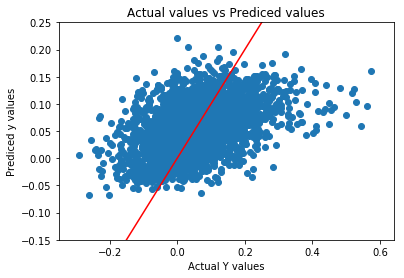

In [205]:
x = np.linspace(-.4, .62, 100)
y = x
plt.plot(x, y , linestyle='solid', color='r')
plt.xlim(-.35, 0.64)
plt.ylim(-.15, 0.25)


plt.scatter(x = y_train.values, y = y_pred_rf7)
plt.xlabel("Actual Y values")
plt.ylabel("Prediced y values")
plt.title("Actual values vs Prediced values")



Text(0.5,1,'Actual values vs Residuals')

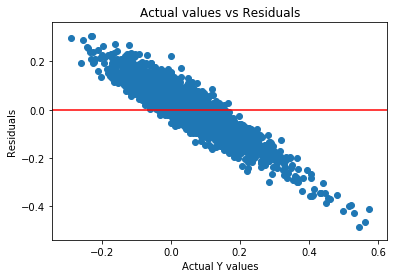

In [206]:
plt.axhline(y=0, color='r', linestyle='solid')

# plt.xlim(-.35, 0.64)
# plt.ylim(-.15, 0.25)


plt.scatter(x = y_train.values, y = rf7_resid)
plt.xlabel("Actual Y values")
plt.ylabel("Residuals")
plt.title("Actual values vs Residuals")


<function matplotlib.pyplot.tight_layout>

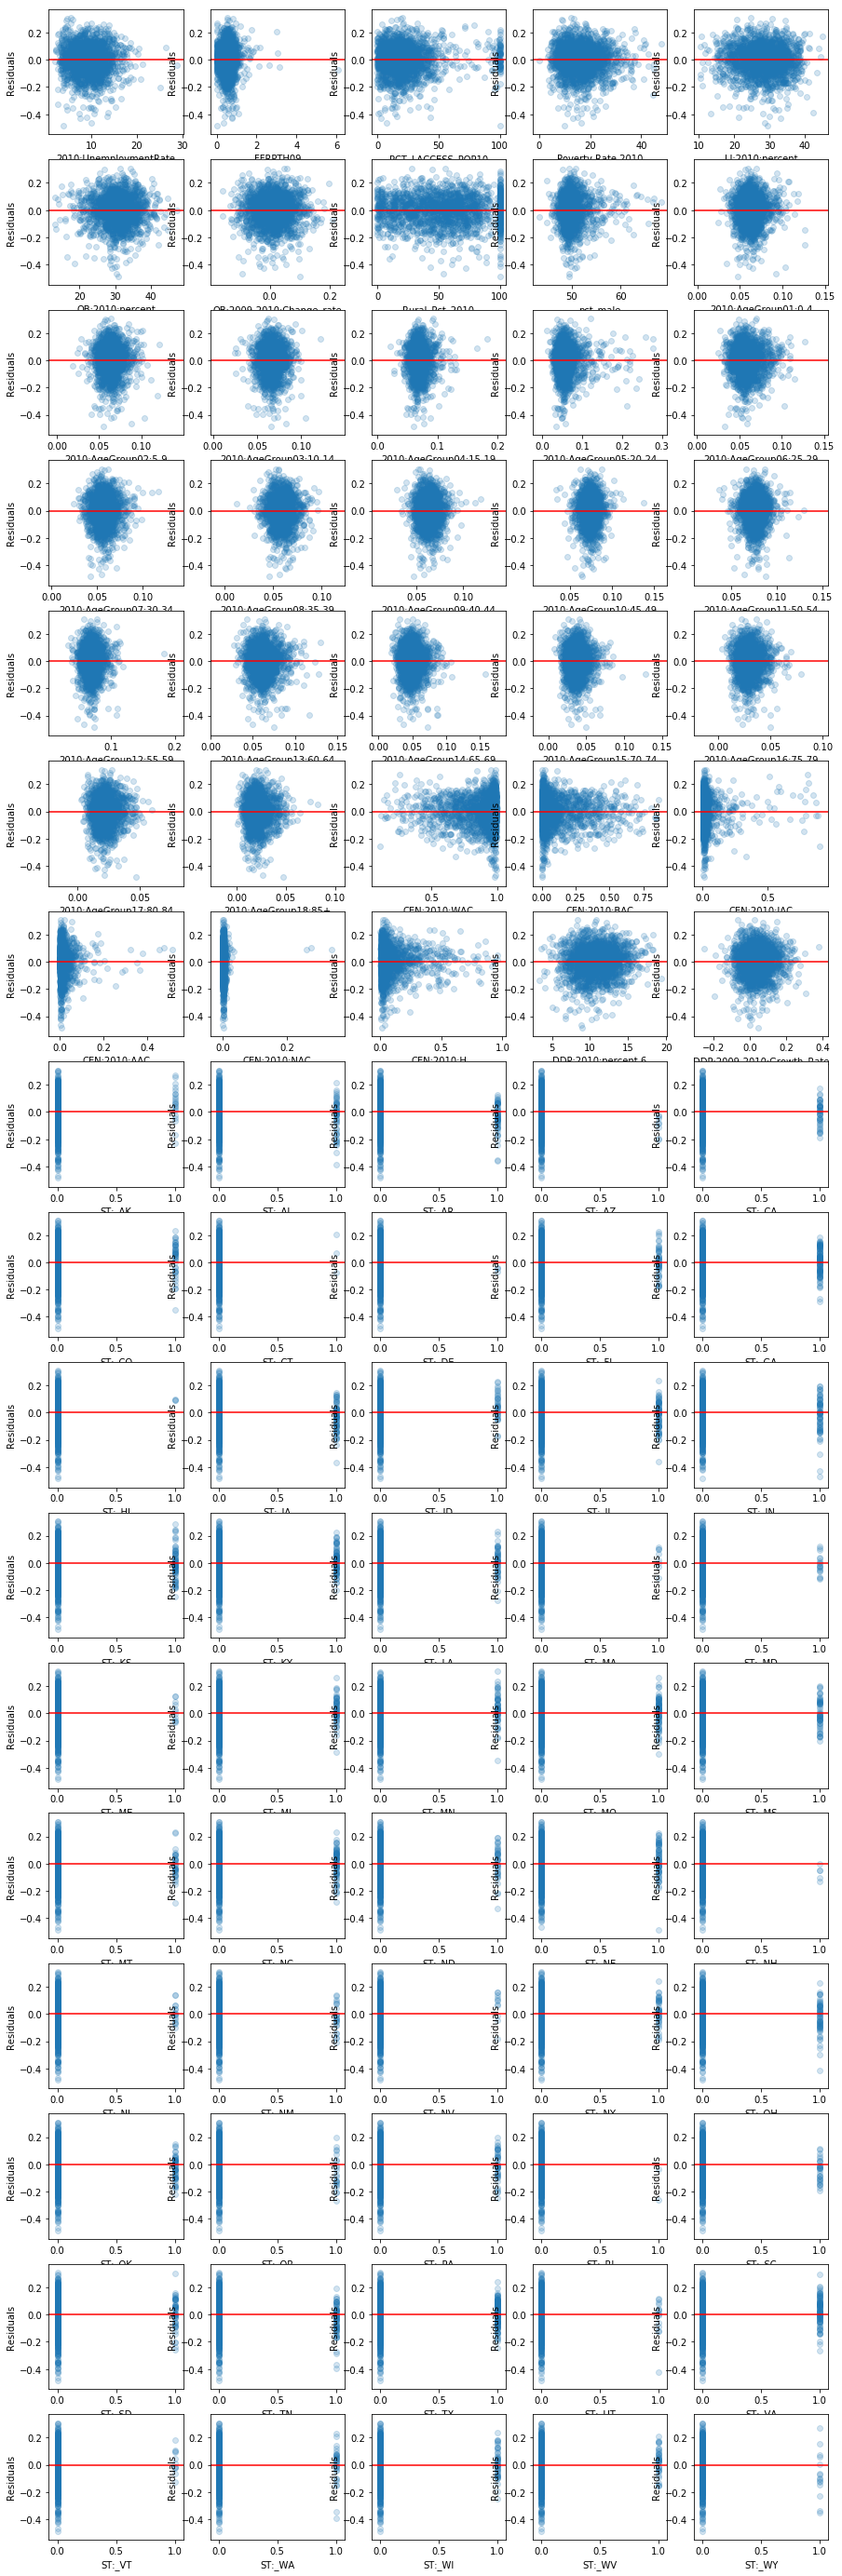

In [213]:
fig, axs = plt.subplots(17, 5, figsize = (15, 50))

af = axs.flatten()

for i in range(len(cols7)):
    af[i].scatter(x = X_train[cols7[i]].values, y = rf7_resid, alpha = .2)
    af[i].set_xlabel(cols7[i])
    af[i].set_ylabel("Residuals")
    af[i].axhline(y=0, color='r', linestyle='solid')

    #af[i].set_title("Actual values vs Residuals")
plt.tight_layout

In [181]:
mod = LinearRegression()
mod.fit(rf7_resid.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [182]:
mod.coef_

array([-1.01255834])

In [183]:
mod.intercept_

0.05611733827243966

# Model 8: Use only best half from model 7

In [173]:
mse = mean_squared_error(y_train, pred)
mse

0.011221721105785861

In [124]:
cols8 = X_train[cols7].columns[model_rf7.feature_importances_.argsort()][50:]

model_rf8 = RandomForestRegressor(n_estimators = 1000, oob_score=True)
model_rf8.fit(X_train[cols8], y_train)
y_pred_rf8 = model_rf8.oob_prediction_

rf8_mse = mean_squared_error(y_train, y_pred_rf8)
rf8_mse

0.011369385178755678

In [ ]:
import statsmodels.api as sm
X_train_sm_1 = sm.add_constant(X_train[feats_numeric], prepend=False)
mod = sm.OLS(np.array(y_train), np.array(X_train_sm_1))
res = mod.fit()
res.summary()

In [ ]:
#GRidSearch for RandomForest

base_estimator= [None, DecisionTreeRegressor(max_depth=4), DecisionTreeRegressor(max_depth=2), DecisionTreeRegressor(max_depth=5) ]  #default max depth 3  DecisionTreeRegressor(max_depth=2) 
n_estimators= [20, 50, 80, 100, 120]  #also try 80
learning_rate= [.001, .01, .05, .1, .5, 1.0, 1.5]

random_grid = {'base_estimator': base_estimator,
               'n_estimators': n_estimators,
               'learning_rate': learning_rate}
print(random_grid)

# Model 9: All (combo), Adaboost

In [225]:
model9 = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=3), n_estimators=50, learning_rate=1.0)  #starting with default parameters

In [226]:
cross_val_score(model9, X_train[cols7], y_train, cv = 5, scoring = "neg_mean_squared_error")

array([-0.01082213, -0.01196713, -0.01200179, -0.01397188, -0.0133336 ])

In [227]:
cross_val_score(model9, X_train[cols7], y_train, cv = 5, scoring = "neg_mean_squared_error").mean()

-0.0122644573860035

In [240]:
#GRidSearch for Adaboost
base_estimator= [None, DecisionTreeRegressor(max_depth=4), DecisionTreeRegressor(max_depth=2), DecisionTreeRegressor(max_depth=5) ]  #default max depth 3  DecisionTreeRegressor(max_depth=2) 
n_estimators= [20, 50, 80, 100, 120]  #also try 80
learning_rate= [.001, .01, .05, .1, .5, 1.0, 1.5]

random_grid = {'base_estimator': base_estimator,
               'n_estimators': n_estimators,
               'learning_rate': learning_rate}
print(random_grid)

{'base_estimator': [None, DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')], 'n_estimators': [20, 50, 80, 100, 120], 

In [241]:
random_search = GridSearchCV(model9, param_grid=random_grid, cv=5, scoring = 'neg_mean_squared_error')
random_search.fit(X_train[cols7], y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator': [None, DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           pres...], 'n_estimators': [20, 50, 80, 100, 120], 'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 1.5]},
       pre_dispatch='2*n_jobs', refit

In [244]:
random_search.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 'learning_rate': 0.5,
 'n_estimators': 100}

In [243]:
random_search.best_score_

-0.011377847910030122

In [ ]:
y_train model9.predict(X_train[cols7])

# Simple Model B: Assume yearly growth same as it's been

In [133]:
X_train['DDP-1-proj'] = X_train['DDP:2009-2010:Growth_Rate'])




In [134]:
y_pred_consistent_rate = X_train['DDP-3-year-proj']

consistent_rate_mse = mean_squared_error(y_train, y_pred_consistent_rate)
consistent_rate_mse

0.7283628847874658

In [131]:
y_train

1211    0.000000
1514    0.053097
2503    0.180000
2818   -0.064516
1167    0.092308
2986   -0.110169
2751   -0.062500
1434   -0.123377
1729    0.188889
897    -0.091743
1778    0.078652
2735    0.195652
2461    0.016667
1615    0.186813
2545    0.122449
957     0.206186
1524    0.120000
899     0.009009
2332   -0.028037
1650   -0.144330
1475    0.116564
2153    0.093750
2226    0.225806
146     0.128440
926     0.007752
2718    0.007353
1457    0.055556
2176    0.064516
1174    0.044444
453     0.039370
          ...   
3129    0.210526
2575    0.025862
2315    0.281481
2622    0.000000
1344    0.000000
173    -0.115942
46      0.449612
62      0.171429
2960   -0.060000
1140    0.073826
3060    0.050420
1042   -0.032520
2578   -0.074766
163     0.219298
1965    0.070312
689     0.103774
1911   -0.020000
263    -0.060000
2473   -0.036232
1155   -0.073333
1169   -0.061538
763     0.000000
1845    0.009804
898     0.009091
919     0.034884
1164    0.088496
500    -0.044118
2989   -0.0122

In [129]:
X_train['DDP-3-year-proj']

1211    1.349746e-05
1514   -5.373839e-04
2503   -2.799902e-04
2818   -5.120000e-07
1167    1.051714e-03
2986    7.938322e-04
2751    1.572189e-03
1434    1.000000e-03
1729   -1.327015e-06
897    -1.921807e-05
1778   -1.061612e-05
2735    1.274950e-03
2461    1.457938e-04
1615    1.322166e-03
2545   -2.620593e-05
957     2.866352e-04
1524    4.264276e-04
899     3.814697e-03
2332    5.276724e-04
1650    7.956666e-05
1475    2.792066e-04
2153    1.852122e-03
2226    1.284211e-06
146     5.528561e-05
926     1.160749e-04
2718    3.324877e-06
1457    1.062482e-03
2176    3.280167e-04
1174    2.699584e-03
453     4.436919e-04
            ...     
3129   -5.125261e-06
2575    9.139892e-05
2315    3.400440e-06
2622   -5.849531e-06
1344   -5.528561e-05
173     1.439193e-03
46      1.160749e-04
62     -8.527154e-04
2960    7.233796e-05
1140    2.594201e-03
3060    3.743700e-04
1042    9.473795e-04
2578    3.430000e-04
163     6.930502e-07
1965    6.086309e-04
689     3.534993e-04
1911    8.499

If i make up a metric to see how much model does at *ordering* them...